# WELCOME! 

### This is the coding playground for the third D(3) Digitial Deep Dive 
### Novermber 3rd 2020
Questions? Feel free to reach out to Christian Lynn
christian_lynn@baxter.com

In [1]:
#Usual Imports
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
import datetime as dt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from scipy.stats import norm, skew #for some statistics
from scipy import stats

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae

In [2]:
#resetting default plot shape
plt.tight_layout(False)
plt.rcParams.update({'text.color' : "r",
                     'axes.labelcolor' : "r"})
plt.rcParams['xtick.color'] = 'r'
plt.rcParams['ytick.color'] = 'r'
sns.set(rc={'figure.figsize':(10,8)})

<Figure size 432x288 with 0 Axes>

## **Starting this Analysis by reading in 2 subsets of data:**
the data collected by the end of session 2, and the full raw data

In [3]:
#RAW DATA HERE
url = 'https://raw.githubusercontent.com/ChristianRLynn/DataSets/main/train.csv'
raw = pd.read_csv(url, error_bad_lines=False); raw.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [4]:
#EDITED DATA LETS SEE HOW WE DID
url2 = 'https://raw.githubusercontent.com/ChristianRLynn/DataSets/main/new_data_intermediate_V2.csv'
part2_data = pd.read_csv(url2, error_bad_lines=False); part2_data.tail(10)

Id  zone_FV  zone_RH  zone_RL  zone_RM  zone_c  YearBuilt  \
1450  1451        0        0        1        0       0       1974   
1451  1452        0        0        1        0       0       2008   
1452  1453        0        0        0        1       0       2005   
1453  1454        0        0        1        0       0       2006   
1454  1455        1        0        0        0       0       2004   
1455  1456        0        0        1        0       0       1999   
1456  1457        0        0        1        0       0       1978   
1457  1458        0        0        1        0       0       1941   
1458  1459        0        0        1        0       0       1950   
1459  1460        0        0        1        0       0       1965   

      YearRemodAdd  bsmt_finish_yn  BsmtFinSF1  ...  NUM_Heat  CentralAir  \
1450          1974               0           0  ...         3           1   
1451          2009               0           0  ...         5           1   
1452          2005               1         547  ...         4           1   
1453          2006               0           0  ...         5           1   
1454          2005               1         410  ...         5           1   
1455          2000               0           0  ...         5           1   
1456          1988               1         790  ...         3           1   
1457          2006               1         275  ...         5           1   
1458          1996               1          49  ...         4           1   
1459          1965               1         830  ...         4           1   

      Fireplaces  NUM_Fire  GarageArea  NUM_GarQual  NUM_GarCond  PavedDrive  \
1450           0         0           0            0            0           1   
1451           1         4         840            3            3           1   
1452           0         0         525            3            3           1   
1453           0         0           0            0            0           1   
1454           0         0         400            3            3           1   
1455           1         3         460            3            3           1   
1456           2         3         500            3            3           1   
1457           2         4         252            3            3           1   
1458           0         0         240            3            3           1   
1459           0         0         276            3            3           1   

      TOT_Porch  LOG(bsmtun)  
1450       61.0     2.952308  
1451       36.0     3.196729  
1452       28.0     0.010000  
1453       74.0     3.056905  
1454      113.0     2.909021  
1455       40.0     2.979093  
1456      174.5     2.770115  
1457       60.0     2.943000  
1458      407.0     0.010000  
1459      436.0     2.133539  

[10 rows x 95 columns]

# The two datasets are below, and using the .shape funtion I can see how big each dataset is in the shape (rows,columns). 
Notice that part2_data is actually bigger than the raw dataset, those are our created features!

In [5]:
raw.shape

(1460, 81)

In [6]:
part2_data.shape

(1460, 95)

In [7]:
part2_data.columns

Index(['Id', 'zone_FV', 'zone_RH', 'zone_RL', 'zone_RM', 'zone_c', 'YearBuilt',
       'YearRemodAdd', 'bsmt_finish_yn', 'BsmtFinSF1', 'basement',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'bath_up_tot', 'bsmt_bath_tot',
       'bath_tot', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'log_porch', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'SalePrice', 'OverallQual', 'OverallCond',
       'ExterQual_NUM', 'ExterCond_NUM', 'bsmt_cond_NUM', 'bsmt_qual_NUM',
       'KitchenQual_NUM', 'quality_tot', 'quality_mult', 'log_qual', 'zeros',
       'TOT_rooms', 'log_ft_per_room', 'log_yfn', 'sold_yfn', 'sale_cond',
       'sale_new', 'sale_other', 'sale_con', 'sale_deed', 'cond_norm',
       'cond_abnorm', 'cond_ajdlnd', 'cond_partial', 'cond_other', 'Blmngtn',
       'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards',
       'Gilbert', 'IDOTRR

In [8]:
#Looking at column data, super helpfull to see our features:
raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Another great function call is describe(). This gives count, mean, std, min, and...
the two middle quartiles (think boxplots)

In [9]:
raw.describe().round(1)

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count  1460.0      1460.0       1201.0    1460.0       1460.0       1460.0   
mean    730.5        56.9         70.0   10516.8          6.1          5.6   
std     421.6        42.3         24.3    9981.3          1.4          1.1   
min       1.0        20.0         21.0    1300.0          1.0          1.0   
25%     365.8        20.0         59.0    7553.5          5.0          5.0   
50%     730.5        50.0         69.0    9478.5          6.0          5.0   
75%    1095.2        70.0         80.0   11601.5          7.0          6.0   
max    1460.0       190.0        313.0  215245.0         10.0          9.0   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count     1460.0        1460.0      1452.0      1460.0  ...      1460.0   
mean      1971.3        1984.9       103.7       443.6  ...        94.2   
std         30.2          20.6       181.1       456.1  ...       125.3   
min       1872.0        1950.0         0.0         0.0  ...         0.0   
25%       1954.0        1967.0         0.0         0.0  ...         0.0   
50%       1973.0        1994.0         0.0       383.5  ...         0.0   
75%       2000.0        2004.0       166.0       712.2  ...       168.0   
max       2010.0        2010.0      1600.0      5644.0  ...       857.0   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
count       1460.0         1460.0     1460.0       1460.0    1460.0   1460.0   
mean          46.7           22.0        3.4         15.1       2.8     43.5   
std           66.3           61.1       29.3         55.8      40.2    496.1   
min            0.0            0.0        0.0          0.0       0.0      0.0   
25%            0.0            0.0        0.0          0.0       0.0      0.0   
50%           25.0            0.0        0.0          0.0       0.0      0.0   
75%           68.0            0.0        0.0          0.0       0.0      0.0   
max          547.0          552.0      508.0        480.0     738.0  15500.0   

       MoSold  YrSold  SalePrice  
count  1460.0  1460.0     1460.0  
mean      6.3  2007.8   180921.2  
std       2.7     1.3    79442.5  
min       1.0  2006.0    34900.0  
25%       5.0  2007.0   129975.0  
50%       6.0  2008.0   163000.0  
75%       8.0  2009.0   214000.0  
max      12.0  2010.0   755000.0  

[8 rows x 38 columns]

Another really interesting call is value_counts()

This call will print out whatever column you send to it with the counts
for all of the unieque values within it. 

So unlike above, you have the prevelance of each value, not just what each column contains



In [10]:
raw['MSZoning'].value_counts().reset_index()

index  MSZoning
0       RL      1151
1       RM       218
2       FV        65
3       RH        16
4  C (all)        10

Very similar to what I like to do with a pivot table, but is so much quicker and can be done on multiple columns quite easily.

In [12]:
for colu in raw:                             #grab column out columns from the dataset. Will cycle through them, but will reference each one as "colu" in turn
    if len(raw[f"{colu}"].unique())<15:   
      print(f'Column Name: {colu}')           # printing out the column name
      print(f"Unique Values: {raw[f'{colu}'].unique()}")    #printing out all the unieque values within raw for each column
      print(f"Value Counts for each variable: \n{raw[f'{colu}'].value_counts()}\n\n")

Column Name: MSZoning
Unique Values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Value Counts for each variable: 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Column Name: Street
Unique Values: ['Pave' 'Grvl']
Value Counts for each variable: 
Pave    1454
Grvl       6
Name: Street, dtype: int64


Column Name: Alley
Unique Values: [nan 'Grvl' 'Pave']
Value Counts for each variable: 
Grvl    50
Pave    41
Name: Alley, dtype: int64


Column Name: LotShape
Unique Values: ['Reg' 'IR1' 'IR2' 'IR3']
Value Counts for each variable: 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Column Name: LandContour
Unique Values: ['Lvl' 'Bnk' 'Low' 'HLS']
Value Counts for each variable: 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Column Name: Utilities
Unique Values: ['AllPub' 'NoSeWa']
Value Counts for each variable: 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Column


Column Name: GarageFinish
Unique Values: ['RFn' 'Unf' 'Fin' nan]
Value Counts for each variable: 
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


Column Name: GarageCars
Unique Values: [2 3 1 0 4]
Value Counts for each variable: 
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


Column Name: GarageQual
Unique Values: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Value Counts for each variable: 
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


Column Name: GarageCond
Unique Values: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Value Counts for each variable: 
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


Column Name: PavedDrive
Unique Values: ['Y' 'N' 'P']
Value Counts for each variable: 
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


Column Name: PoolArea
Unique Values: [  0 512 648 576 555 480 519 738]
Value Counts for each variable: 
0      1453
738       1
648       1


I can also filter columns much more easily than in excel, I can either omit them by using a data.drop(columns="what","ever","we","dont",want")
or by creating a list of the columns we do want to keep



In [13]:
colers=['MSZoning', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'ExterCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'YrSold', 'SaleType', 'SalePrice']

In [14]:
raw_small=raw[colers]

In [15]:
raw_small

MSZoning  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          RL         65.0     8450            7            5       2003   
1          RL         80.0     9600            6            8       1976   
2          RL         68.0    11250            7            5       2001   
3          RL         60.0     9550            7            5       1915   
4          RL         84.0    14260            8            5       2000   
...       ...          ...      ...          ...          ...        ...   
1455       RL         62.0     7917            6            5       1999   
1456       RL         85.0    13175            6            6       1978   
1457       RL         66.0     9042            7            9       1941   
1458       RL         68.0     9717            5            6       1950   
1459       RL         75.0     9937            5            6       1965   

      YearRemodAdd ExterQual ExterCond  BsmtFinSF1  ...  TotRmsAbvGrd  \
0             2003        Gd        TA         706  ...             8   
1             1976        TA        TA         978  ...             6   
2             2002        Gd        TA         486  ...             6   
3             1970        TA        TA         216  ...             7   
4             2000        Gd        TA         655  ...             9   
...            ...       ...       ...         ...  ...           ...   
1455          2000        TA        TA           0  ...             7   
1456          1988        TA        TA         790  ...             7   
1457          2006        Ex        Gd         275  ...             9   
1458          1996        TA        TA          49  ...             5   
1459          1965        Gd        TA         830  ...             6   

      GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0              2           0           61              0          0   
1              2         298            0              0          0   
2              2           0           42              0          0   
3              3           0           35            272          0   
4              3         192           84              0          0   
...          ...         ...          ...            ...        ...   
1455           2           0           40              0          0   
1456           2         349            0              0          0   
1457           1           0           60              0          0   
1458           1         366            0            112          0   
1459           1         736           68              0          0   

      ScreenPorch  YrSold SaleType  SalePrice  
0               0    2008       WD     208500  
1               0    2007       WD     181500  
2               0    2008       WD     223500  
3               0    2006       WD     140000  
4               0    2008       WD     250000  
...           ...     ...      ...        ...  
1455            0    2007       WD     175000  
1456            0    2010       WD     210000  
1457            0    2010       WD     266500  
1458            0    2010       WD     142125  
1459            0    2008       WD     147500  

[1460 rows x 29 columns]

Let's create one of our favorite columns that we had created, tot_porch.
It is easy to do additions and create new columns: simply create the new column first, then insert the combination/calculations of columns that you want

In [16]:
raw_small['tot_porch']=raw_small['EnclosedPorch']+raw_small['3SsnPorch']+raw_small['ScreenPorch'];
raw_small.drop(columns=['EnclosedPorch', '3SsnPorch','ScreenPorch'],inplace=True)

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now, to recreate the correlation chart that we created in excel, 
that allowed us to drop useless-ish columns before and focus on what mattered. 

In [17]:
raw_small

MSZoning  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          RL         65.0     8450            7            5       2003   
1          RL         80.0     9600            6            8       1976   
2          RL         68.0    11250            7            5       2001   
3          RL         60.0     9550            7            5       1915   
4          RL         84.0    14260            8            5       2000   
...       ...          ...      ...          ...          ...        ...   
1455       RL         62.0     7917            6            5       1999   
1456       RL         85.0    13175            6            6       1978   
1457       RL         66.0     9042            7            9       1941   
1458       RL         68.0     9717            5            6       1950   
1459       RL         75.0     9937            5            6       1965   

      YearRemodAdd ExterQual ExterCond  BsmtFinSF1  ...  KitchenAbvGr  \
0             2003        Gd        TA         706  ...             1   
1             1976        TA        TA         978  ...             1   
2             2002        Gd        TA         486  ...             1   
3             1970        TA        TA         216  ...             1   
4             2000        Gd        TA         655  ...             1   
...            ...       ...       ...         ...  ...           ...   
1455          2000        TA        TA           0  ...             1   
1456          1988        TA        TA         790  ...             1   
1457          2006        Ex        Gd         275  ...             1   
1458          1996        TA        TA          49  ...             1   
1459          1965        Gd        TA         830  ...             1   

      KitchenQual  TotRmsAbvGrd  GarageCars  WoodDeckSF  OpenPorchSF  YrSold  \
0              Gd             8           2           0           61    2008   
1              TA             6           2         298            0    2007   
2              Gd             6           2           0           42    2008   
3              Gd             7           3           0           35    2006   
4              Gd             9           3         192           84    2008   
...           ...           ...         ...         ...          ...     ...   
1455           TA             7           2           0           40    2007   
1456           TA             7           2         349            0    2010   
1457           Gd             9           1           0           60    2010   
1458           Gd             5           1         366            0    2010   
1459           TA             6           1         736           68    2008   

      SaleType SalePrice  tot_porch  
0           WD    208500          0  
1           WD    181500          0  
2           WD    223500          0  
3           WD    140000        272  
4           WD    250000          0  
...        ...       ...        ...  
1455        WD    175000          0  
1456        WD    210000          0  
1457        WD    266500          0  
1458        WD    142125        112  
1459        WD    147500          0  

[1460 rows x 27 columns]

In [18]:
dfer = pd.DataFrame(part2_data[part2_data.columns])
corr = dfer.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


Great, now let's filter out all the columns that show a good correlation with our target "SalePrice"

In [19]:
correlated=pd.DataFrame(index=part2_data.index)                                #create the empty space first
for colu in part2_data.drop(columns=['Id']):                                   #cycle through each column
  if abs(part2_data['SalePrice'].corr(part2_data[f'{colu}'])) >=.5:            # only get columns correlated with SalePrice .5 or higher
    print(colu)                                                                # Print and add to new dataframe "correlated"
    correlated[f'{colu}']=(part2_data[f'{colu}'])

YearBuilt
YearRemodAdd
TotalBsmtSF
1stFlrSF
GrLivArea
FullBath
bath_up_tot
bath_tot
GarageCars
SalePrice
OverallQual
ExterQual_NUM
bsmt_cond_NUM
KitchenQual_NUM
quality_tot
quality_mult
log_qual
TOT_rooms
log_ft_per_room
log_yfn
NUM_BsmtQual
NUM_Fire
GarageArea


In [20]:
dfer = pd.DataFrame(correlated[correlated.columns])
corr = dfer.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Look at the highy red areas, the quality ratings are very similar AND have high impact on the target. What one shall we pick to keep?

Also, I have BOTH YearBuilt and log_yfn (years from now). What one to choose now? 

In [21]:
cor=correlated.drop(columns=['FullBath', 'TOT_rooms', 'YearBuilt', 'quality_mult', 'log_qual'])

The same visualizations that we created in Excel, are done here much more easily. 
There are a multitude of things we can do to visualize data, but I want to get to modeling and talk about that

In [22]:
cor

YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  bath_up_tot  bath_tot  \
0             2003          856       856       1710          2.5       3.5   
1             1976         1262      1262       1262          2.0       2.5   
2             2002          920       920       1786          2.5       3.5   
3             1970          756       961       1717          1.0       2.0   
4             2000         1145      1145       2198          2.5       3.5   
...            ...          ...       ...        ...          ...       ...   
1455          2000          953       953       1647          2.5       2.5   
1456          1988         1542      2073       2073          2.0       3.0   
1457          2006         1152      1188       2340          2.0       2.0   
1458          1996         1078      1078       1078          1.0       2.0   
1459          1965         1256      1256       1256          1.5       2.5   

      GarageCars  SalePrice  OverallQual  ExterQual_NUM  bsmt_cond_NUM  \
0              2     208500            7              4              4   
1              2     181500            6              3              4   
2              2     223500            7              4              4   
3              3     140000            7              3              3   
4              3     250000            8              4              4   
...          ...        ...          ...            ...            ...   
1455           2     175000            6              3              4   
1456           2     210000            6              3              4   
1457           1     266500            7              5              3   
1458           1     142125            5              3              3   
1459           1     147500            5              4              3   

      KitchenQual_NUM  quality_tot  log_ft_per_room   log_yfn  NUM_BsmtQual  \
0                   4           30         2.387898  0.903090             4   
1                   3           30         2.322908  1.544068             4   
2                   4           30         2.406783  1.000000             4   
3                   4           29         2.535800  1.982271             3   
4                   4           31         2.438938  1.041393             4   
...               ...          ...              ...       ...           ...   
1455                3           27         2.371596  1.079181             4   
1456                3           28         2.538448  1.518514             4   
1457                4           36         2.524118  1.845098             3   
1458                4           27         2.430559  1.785330             3   
1459                3           27         2.320838  1.662758             3   

      NUM_Fire  GarageArea  
0            0         548  
1            3         460  
2            3         608  
3            4         642  
4            3         836  
...        ...         ...  
1455         3         460  
1456         3         500  
1457         4         252  
1458         0         240  
1459         0         276  

[1460 rows x 18 columns]

Before we model, just want to show how much easier it is to edit and controll graphs in Python compared to Excel

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

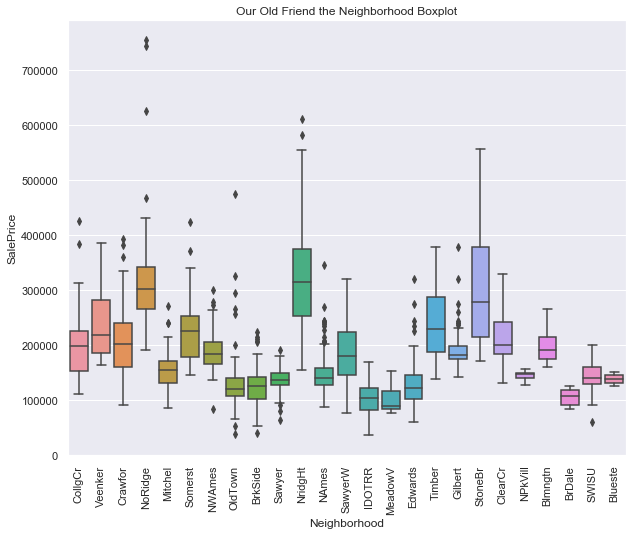

In [23]:
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=raw).set_title("Our Old Friend the Neighborhood Boxplot")
plt.xticks(rotation=90)

## OUR FIRST MODEL!

Let us define another metric that we will look at today. 
Root Mean Squared Error is a great statistic, and it punishes outliers very harshly.

In [24]:
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val   

We need to define out train and test data. One we will use to train our model on (think homework)
the other test set (like a test with unseen answers) will be used for validation. 

In [25]:
#part 2 data split
X_train, X_test, y_train, y_test = train_test_split(part2_data.drop(columns='SalePrice'), part2_data.SalePrice, test_size=0.33, random_state=42)

In [26]:
#part 2 data split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(correlated.drop(columns='SalePrice'), correlated.SalePrice, test_size=0.33, random_state=42)

In [27]:
# Raw splity, lets start here!
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(raw.drop(columns='SalePrice'), raw.SalePrice, test_size=0.33, random_state=42)

### This is how Pythjon and ScikitLearn work

Model choice comes here

fitting(features,target)   #Where the model trains on past data

predicting(train_features/test_features)    #the model then gets to test itself 

scoring(test_features,test_target)       

In [28]:
reg = LinearRegression() #defining our model

#fitting the model
reg = reg.fit(X_train_raw,y_train_raw)

#Predicting both training and test sets so I can compare to reality
pred_train = reg.predict(X_train_raw)
pred_test = reg.predict(X_test_raw)

#Scoring both the training sets and the test sets
y_pred = reg.score(X_test_raw,y_test_raw)
ttree = reg.score(X_train_raw, y_train_raw)

#testing metrics are output here
print("Training score of Regression Model",ttree)
print("Testing Score of Regression Model",y_pred)
print(f'\nTraining RMSE of model: {rmse(pred_train,y_train_raw)}')
print(f'Testing RMSE of model: {rmse(pred_test,y_test_raw)}')

ValueError: could not convert string to float: 'RL'

#### What happened here?? We did not check our data before we began modeling.

Right now our model is responding to catagorical values still in the raw dataset (MSZoning here).

We also need to check for NaN values (empty), values that are extreme (think infinite), and any other errors we want!

Excel is not always good at telling us where or when we have missing values, sometimes in numerical columns it will simply just add a 0!

In [29]:
raw_data_na = (raw.isnull().sum() / len(raw)) * 100 #creating percentages of missing values (missing/total * 100)
raw_data_na = raw_data_na.drop(raw_data_na[raw_data_na == 0].index).sort_values(ascending=False)[:40] #Focus
missing_data_raw = pd.DataFrame({'Missing Ratio in Raw' :raw_data_na})
missing_data_raw.head(20)

Missing Ratio in Raw
PoolQC                   99.520548
MiscFeature              96.301370
Alley                    93.767123
Fence                    80.753425
FireplaceQu              47.260274
LotFrontage              17.739726
GarageYrBlt               5.547945
GarageType                5.547945
GarageFinish              5.547945
GarageQual                5.547945
GarageCond                5.547945
BsmtFinType2              2.602740
BsmtExposure              2.602740
BsmtFinType1              2.534247
BsmtCond                  2.534247
BsmtQual                  2.534247
MasVnrArea                0.547945
MasVnrType                0.547945
Electrical                0.068493

#### To test our our Excel-based feature cleaning and engineering, lets see if we can build a model!

In [30]:
data_na = (part2_data.isnull().sum() / len(raw)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:40]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data

Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [31]:
correlated[correlated.YearBuilt.isna()]

Empty DataFrame
Columns: [YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, bath_up_tot, bath_tot, GarageCars, SalePrice, OverallQual, ExterQual_NUM, bsmt_cond_NUM, KitchenQual_NUM, quality_tot, quality_mult, log_qual, TOT_rooms, log_ft_per_room, log_yfn, NUM_BsmtQual, NUM_Fire, GarageArea]
Index: []

[0 rows x 23 columns]

In [32]:
data_na = 100-(np.isfinite(part2_data).sum() / len(raw)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:40]
missing_data = pd.DataFrame({'Infinate Ratio' :data_na})
missing_data

Empty DataFrame
Columns: [Infinate Ratio]
Index: []

### Lets give it a shot with our cleaned dataset!

In [33]:
#fitting the model we hav already defined
reg = reg.fit(X_train,y_train)

#Predicting both training and test sets so I can compare to reality
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

#Scoring both the training sets and the test sets
y_pred = reg.score(X_test,y_test)
ttree = reg.score(X_train, y_train)

#testing metrics are output here
#default score for regression model is R^2
print("Training score of part2 Regression Model",ttree)
print("Testing Score of part2 Regression Model",y_pred)

#Mean Absolute Error is a great metric, it is the average deviation between prediction and reality
print(f'\nTraining MAE of part2 model: {mae(pred_train,y_train)}')
print(f'Testing MAE of part2 model: {mae(pred_test,y_test)}')

#RMSE - Root Mean Squared error, another typical metic, this one has a squared term to penalize big misses
print(f'\nTraining RMSE of part2 model: {rmse(pred_train,y_train)}')
print(f'Testing RMSE of part2 model: {rmse(pred_test,y_test)}')

Training score of part2 Regression Model 0.8576154092514272
Testing Score of part2 Regression Model 0.8396347877760921

Training MAE of part2 model: 18779.867842156335
Testing MAE of part2 model: 19358.014916335113

Training RMSE of part2 model: 28729.450413018185
Testing RMSE of part2 model: 34311.86068344616


In [34]:
#With our much smaller dataset of 17 features
reg2 = LinearRegression() #redefining our model
reg2 = reg.fit(X_train_s,y_train_s)
y_pred_s = reg2.score(X_test_s,y_test_s)
ttree_s = reg2.score(X_train_s, y_train_s)
pred_train_s = reg.predict(X_train_s)
pred_test_s = reg.predict(X_test_s)
print("Training score of small Regression Model",ttree_s)
print("Testing Score of small Regression Model",y_pred_s)
print(f'\nTraining RMSE of small model: {rmse(pred_train_s,y_train_s)}')
print(f'Testing RMSE of small model: {rmse(pred_test_s,y_test_s)}')
print(f'\nTraining MAE of small: {mae(pred_train_s,y_train_s)}')
print(f'Testing MAE of small model: {mae(pred_test_s,y_test_s)}')

Training score of small Regression Model 0.8011496808776501
Testing Score of small Regression Model 0.8131338817349698

Training RMSE of small model: 33951.50016921588
Testing RMSE of small model: 37038.59211982003

Training MAE of small: 21786.71350251347
Testing MAE of small model: 23147.720992797917


WOW! We explained 84% of the variation in the dataset! But we still have a long way to go.

We are going to revisit this, for if we can explain the same amount of variation in the data with a much smaller model,
we can more easily deploy it, explain it, and make it faster!

# Here were my first thoughts of transforming the Raw dataset:

### Let's take that first model as a baseline, if we can't beat that easily, maybe we stop there!
 

In [35]:
#very robust model, able to handle outliers, typically a great place to start
forest = RandomForestRegressor()

#fitting the model to the data
forest = forest.fit(X_train,y_train)
#Score the results
train_score_forest = forest.score(X_train, y_train)
test_score_forest = forest.score(X_test,y_test)

pred_train_forest = forest.predict(X_train)
pred_test_forest = forest.predict(X_test)
print("Training score of RF Model",train_score_forest)
print("Testing Score of RF Model",test_score_forest)
print(f'\nTraining RMSE of RF model: {rmse(pred_train_forest,y_train)}')
print(f'Testing RMSE of RF model: {rmse(pred_test_forest,y_test)}')
print(f'\nTraining MAE of RF model: {mae(pred_train_forest,y_train)}')
print(f'Testing MAE of RF model: {mae(pred_test_forest,y_test)}')

Training score of RF Model 0.9782924637696634
Testing Score of RF Model 0.8844392433992538

Training RMSE of RF model: 11217.629445175915
Testing RMSE of RF model: 29126.907493454884

Training MAE of RF model: 6667.599325153375
Testing MAE of RF model: 16556.358962655602


Let's not immediately start throwing models at the data, for although we have improved, we have not done much other than throwing fancy algos at the data.

This will be our new baseline, and we need to work hard to beat this!

### Starting with the RAW dataset, what do we need to fix or what can we improve?

Maybe let's look for outliers, and there are many ways to do this with statistics, so I will not bore you here with them.

Revisiting week 2 leaves us with this one outler set, how do we visualize and remove the value in python?

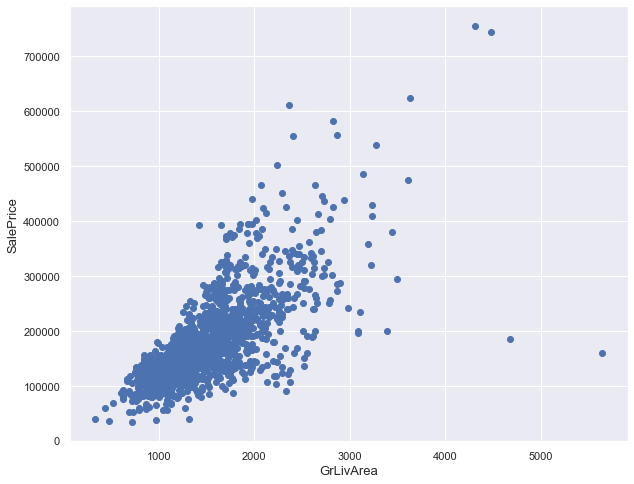

In [36]:
fig, ax = plt.subplots()
ax.scatter(x = raw['GrLivArea'], y = raw['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [37]:
train = raw.drop(raw[(raw['GrLivArea']>4000) & (raw['SalePrice']<300000)].index) 
#very similar to an excel foruma here, but in the same "new_thing = data[filter1]" notation

In [38]:
full_data_clean=train.copy()

There are many ways to clean data, and to get python code to do what you want. 
To fill empty values, the .fillna() call is your best friend.
You can fill with a constant, means, or medians.

In [39]:
#All of these missing values refer to certain columns where features are not present. 
#Missing means 0 here. 
full_data_clean["PoolQC"] = full_data_clean["PoolQC"].fillna(0)
full_data_clean["MiscFeature"] = full_data_clean["MiscFeature"].fillna(0)
full_data_clean["Alley"] = full_data_clean["Alley"].fillna(0)
full_data_clean["Fence"] = full_data_clean["Fence"].fillna(0)
full_data_clean["FireplaceQu"] = full_data_clean["FireplaceQu"].fillna(0)
full_data_clean["MasVnrArea"] = full_data_clean["MasVnrArea"].fillna(0)
full_data_clean["Electrical"] = full_data_clean["Electrical"].fillna(0)
full_data_clean["LotFrontage"] = full_data_clean["LotFrontage"].fillna(0)

If you have large segments of data, you can also use a loop to move through all the columns you want.
Below are all the basement and garage metrics (both where NA means 0)

In [40]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
            'BsmtFullBath', 'BsmtHalfBath','GarageYrBlt', 'GarageArea', 'GarageCars'):
    full_data_clean[col] = full_data_clean[col].fillna(0)

In [41]:
#These variables are catagorical, so we can fill them with a different label
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    full_data_clean[col] = full_data_clean[col].fillna('None')

In [42]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    full_data_clean[col] = full_data_clean[col].fillna("None")

In [43]:
full_data_clean["MasVnrType"] = full_data_clean["MasVnrType"].fillna("None")

But What about values that have no difinitive zero value in the data?

MSZoning and Electrical should all have values but do not.


This is more similar to a problem we see in the real world, most of Baxter data is in this shape,

and what we choose to do here can have large influences on the outcome of any model

Lets look at MSZoning

In [44]:
full_data_clean['MSZoning'].value_counts()

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [45]:
full_data_clean['MSZoning'] = full_data_clean['MSZoning'].fillna('RL') #Filling with Meaian data, easily done

In [46]:
full_data_clean['Electrical'].value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
0           1
Name: Electrical, dtype: int64

In [47]:
full_data_clean['Electrical'] = full_data_clean['Electrical'].fillna('SBrkr') #same here too

Are there other fancy options? 

Yes, but for the percentage of missing data here (small), and the impact it will have being somewhat simplified (small)

We can take the easy route here. 

What about all of the columns that are not as easily handled?
I have spoken before about dummy and one-hot encoding. Lets look really quicky at Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(full_data_clean[c].values)) 
    full_data_clean[c] = lbl.transform(list(full_data_clean[c].values))

# shape        
print('Shape all_data: {}'.format(full_data_clean.shape))

Shape all_data: (1458, 81)


## There are Many Ways to Clean this Dataset:
### I chose to code a bit more, but be able to repeatably create good data down the line

### We want calculations that can handle problems and mistakes better, I have accounted for misspelling all below

In [49]:
#we can look at features that are non-numerical first
train.select_dtypes(include=['object'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0         CollgCr       Norm  ...     Attchd          RFn         TA   
1         Veenker      Feedr  ...     Attchd          RFn         TA   
2         CollgCr       Norm  ...     Attchd          RFn         TA   
3         Crawfor       Norm  ...     Detchd          Unf         TA   
4         NoRidge       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1455      Gilbert       Norm  ...     Attchd          RFn         TA   
1456       NWAmes       Norm  ...     Attchd          Unf         TA   
1457      Crawfor       Norm  ...     Attchd          RFn         TA   
1458        NAmes       Norm  ...     Attchd          Unf         TA   
1459      Edwards       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1458 rows x 43 columns]

In [50]:
#fill the columns with zeros or nones that are easy
train['GarageYrBlt']=train['GarageYrBlt'].fillna(0)
train['MasVnrArea']=train['MasVnrArea'].fillna(0)
train['LotFrontage']=train['LotFrontage'].fillna(0)
train['MasVnrType']=train['MasVnrType'].fillna("None")

In [51]:
#The APPLY function is super fast in python, therefore these calls go through the dataset row by row but much faster than a loop would
train['Alley']=train['Alley'].apply(lambda x: 1 if x!=0 else 0)
train['LotShape']=train['LotShape'].apply(lambda x: 1 if x=='Reg' or x=='IR1' else 0)
train['LandContour']=train['LandContour'].apply(lambda x: 1 if x=='Lvl' else 0)
train['Utilities']=train['Utilities'].apply(lambda x: 1 if x=='AllPub' or x=='NoSewr' else 0)
train['LotConfig']=train['LotConfig'].apply(lambda x: 1 if x=='Inside' or x=='CulDSac' else 0)
train['LotConfig']=train['LotConfig'].apply(lambda x: 1 if x=='Inside' or x=='CulDSac' else 0)
train['LandSlope']=train['LandSlope'].apply(lambda x: 1 if x=='Gtl' else 0)
train['ExterQual']=train['ExterQual'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else 1))))
train['ExterCond']=train['ExterCond'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else 1))))
train['BsmtQual']=train['BsmtQual'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
train['BsmtCond']=train['BsmtCond'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
train['BsmtExposure']=train['BsmtExposure'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
train['BsmtFinType1']=train['BsmtFinType1'].apply(lambda x: 5 if x=='GLQ' else (4 if x=='ALQ' else (3 if x=='BLQ' else (2 if x=='Rec' else (1 if x=='LwQ' else 0)))))
train['BsmtFinType2']=train['BsmtFinType2'].apply(lambda x: 5 if x=='GLQ' else (4 if x=='ALQ' else (3 if x=='BLQ' else (2 if x=='Rec' else (1 if x=='LwQ' else 0)))))
train['HeatingQC']=train['HeatingQC'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
train['CentralAir']=train['CentralAir'].apply(lambda x: 1 if x=='Y' else 0)
train['KitchenQual']=train['KitchenQual'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else 1))))
train['Functional']=train['Functional'].apply(lambda x: 5 if x=='GLQ' else (4 if x=='ALQ' else (3 if x=='BLQ' else (2 if x=='Rec' else (1 if x=='LwQ' else 0)))))
train['FireplaceQu']=train['FireplaceQu'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
train['GarageFinish']=train['GarageFinish'].apply(lambda x: 3 if x=='Fin' else (2 if x=='RFn' else (1 if x=='Unf' else 0)))
train['GarageQual']=train['GarageQual'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
train['GarageCond']=train['GarageCond'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
train['PavedDrive']=train['PavedDrive'].apply(lambda x: 1 if x=='Y' or x=='P' else 0)
train['PoolQC']=train['PoolQC'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
train['Fence']=train['Fence'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))

#we can even create new features here
train['TOT_bath']=train['FullBath']+(.5*train['HalfBath'])

In [52]:
# Creating One-Hot-Encodings for catagorical columns
# Then deleting the columns in the next row using inplace

train=pd.concat([train,pd.get_dummies(train.MSZoning)],axis=1)
train.drop(columns=('MSZoning'),inplace=True)

train=pd.concat([train,pd.get_dummies(train.MSSubClass)],axis=1)
train.drop(columns=('MSSubClass'),inplace=True)

train=pd.concat([train,pd.get_dummies(train.Neighborhood)],axis=1)
train.drop(columns=('Neighborhood'),inplace=True)

train=pd.concat([train,pd.get_dummies(train.BldgType)],axis=1)
train.drop(columns=('BldgType'),inplace=True)

train=pd.concat([train,pd.get_dummies(train.HouseStyle)],axis=1)
train.drop(columns=('HouseStyle'),inplace=True)

train=pd.concat([train,pd.get_dummies(train.GarageType)],axis=1)
train.drop(columns=('GarageType'),inplace=True)

train=pd.concat([train,pd.get_dummies(train.SaleCondition)],axis=1)
train.drop(columns=('SaleCondition'),inplace=True)

train=pd.concat([train,pd.get_dummies(train.SaleType)],axis=1)
train.drop(columns=('SaleType'),inplace=True)

train=pd.concat([train,pd.get_dummies(train.Condition1)],axis=1)
train.drop(columns=('Condition1'),inplace=True)

train=pd.concat([train,pd.get_dummies(train.MasVnrType)],axis=1)
train.drop(columns=('MasVnrType'),inplace=True)

train=pd.concat([train,pd.get_dummies(train.Foundation)],axis=1)
train.drop(columns=('Foundation'),inplace=True)

In [53]:
train.reset_index(inplace=True)
train=train.drop(columns=['Id','Street','Condition2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'Heating',
                          'Electrical','MiscFeature'])

How did we do??

In [54]:
train.select_dtypes(include=['object']).head(5)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [55]:
#Lets make sure we don't have any Extreme or missing values 
for column in train:
    print(f'for column {column}') 
    print(f'\tMAX={train[column].max()}') 
    print(f'\tMIN={train[column].min()}') 
    print(f'\tNAN={train[column].isna().sum()}')

for column index
	MAX=1459
	MIN=0
	NAN=0
for column LotFrontage
	MAX=313.0
	MIN=0.0
	NAN=0
for column LotArea
	MAX=215245
	MIN=1300
	NAN=0
for column Alley
	MAX=1
	MIN=1
	NAN=0
for column LotShape
	MAX=1
	MIN=0
	NAN=0
for column LandContour
	MAX=1
	MIN=0
	NAN=0
for column Utilities
	MAX=1
	MIN=0
	NAN=0
for column LotConfig
	MAX=0
	MIN=0
	NAN=0
for column LandSlope
	MAX=1
	MIN=0
	NAN=0
for column OverallQual
	MAX=10
	MIN=1
	NAN=0
for column OverallCond
	MAX=9
	MIN=1
	NAN=0
for column YearBuilt
	MAX=2010
	MIN=1872
	NAN=0
for column YearRemodAdd
	MAX=2010
	MIN=1950
	NAN=0
for column MasVnrArea
	MAX=1600.0
	MIN=0.0
	NAN=0
for column ExterQual
	MAX=5
	MIN=2
	NAN=0
for column ExterCond
	MAX=5
	MIN=1
	NAN=0
for column BsmtQual
	MAX=5
	MIN=0
	NAN=0
for column BsmtCond
	MAX=4
	MIN=0
	NAN=0
for column BsmtExposure
	MAX=4
	MIN=0
	NAN=0
for column BsmtFinType1
	MAX=5
	MIN=0
	NAN=0
for column BsmtFinSF1
	MAX=2188
	MIN=0
	NAN=0
for column BsmtFinType2
	MAX=5
	MIN=0
	NAN=0
for column BsmtFinSF2
	MAX=

### Functions:
functions are small parts of code that you can define to do things. 
They work similarly to a lot of what has been done earlier ("Iwanttodosomethingto(thisDF)")
You create the function, then tell it what to expect incoming, 
you do things within it, then output (or not) what you want!

In [56]:
def year_transform(df, years_column):             #defining incoming dataframe and column for transformation
    for column in years_column:                   #loop
        df[column]=df[column]-(df[column].min()-1) #want numbers 1-> whatever with oldest houses being a large number
        df[column]=df[column].apply(lambda x: 0 if x==0 else np.log10(x)) #we know we need to take the Log for distrobution problems
    return df

In [57]:
#now we can quickly and easlily send lots of columns in, and get them all traqnsformed in one line!
years_column=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
train=year_transform(train,years_column)

## Lets get to more modeling!

In [58]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import RidgeCV, LassoLars, Ridge, ElasticNet, HuberRegressor
from sklearn.preprocessing import QuantileTransformer, quantile_transform

In [59]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(train.drop(columns='SalePrice'), train.SalePrice, test_size=0.33, random_state=42)

In [60]:
log = LinearRegression()
log = log.fit(X_train3,y_train3)
y_pred3 = log.score(X_test3,y_test3)
ttree3 = log.score(X_train3, y_train3)
pred3_train = log.predict(X_train3)
pred3_test = log.predict(X_test3)
print("Training score of Tree Model",ttree3)
print("Testing Score of Tree Model",y_pred3)
print(f'\nTraining RMSE of model: {rmse(pred3_train,y_train3)}')
print(f'Testing RMSE of model: {rmse(pred3_test,y_test3)}')

Training score of Tree Model 0.9237553503707113
Testing Score of Tree Model 0.8569798347692644

Training RMSE of model: 22179.75727304782
Testing RMSE of model: 29381.72515822748


Looks like we are already doing better!
Much closer to out baseline preformer, did our changes effect the baseline as well?

In [61]:
tree = RandomForestRegressor()
tree = tree.fit(X_train3,y_train3)
y_pred3 = tree.score(X_test3,y_test3)
ttree3 = tree.score(X_train3, y_train3)
pred3_trainRF = tree.predict(X_train3)
pred3_testRF = tree.predict(X_test3)
print("Training score of Tree Model",ttree3)
print("Testing Score of Tree Model",y_pred3)
print(f'\nTraining RMSE of model: {rmse(pred3_trainRF,y_train3)}')
print(f'Testing RMSE of model: {rmse(pred3_testRF,y_test3)}')

Training score of Tree Model 0.9819465188973893
Testing Score of Tree Model 0.8997491704444652

Training RMSE of model: 10792.76150891688
Testing RMSE of model: 24599.293926936465


Yes, up to 90% explained variance. Very cool!
What can we do to inspect what is actually going on point-by-point, or how can we improve the linear model

### Residual Test

What is this "residuals" stuff? This is a basic test that attempts to uncover if we have left information out of consideration of the model. 

How? The residuals are the measurements between the predicted scores and the actual scores.

If there is a pattern left in those differences, there is a trend missing from our predictions. 

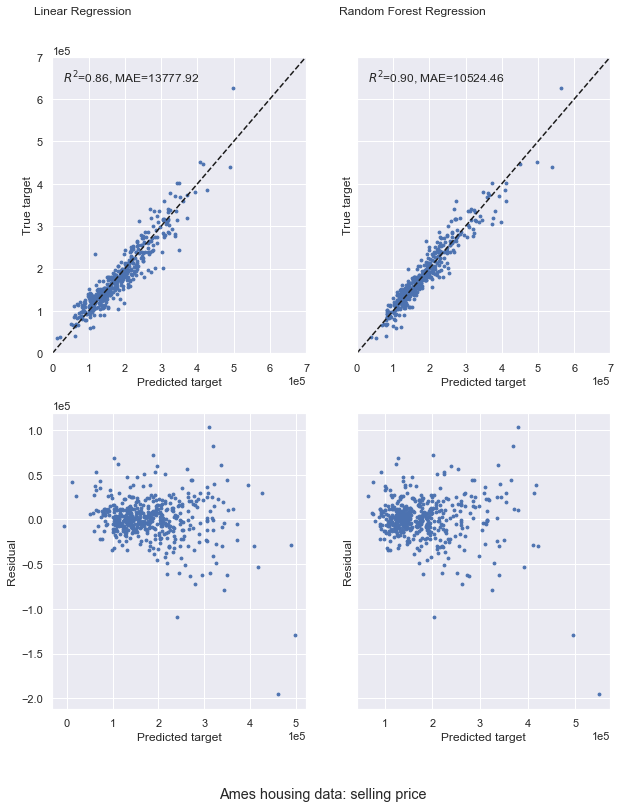

In [123]:
from sklearn.metrics import median_absolute_error, r2_score
f, (ax0, ax1) = plt.subplots(2, 2, sharey='row', figsize=(10, 12))

ax0[0].scatter(pred3_test, y_test3, s=8)
ax0[0].plot([0, 7e5], [0, 7e5], '--k')
ax0[0].set_ylabel('True target')
ax0[0].set_xlabel('Predicted target')
ax0[0].text(s='Linear Regression', x=-5e4,
            y=8e5, fontsize=12, multialignment='center')
ax0[0].text(3e4, 64e4, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test3, pred3_test), median_absolute_error(y_test3, pred3_test)))
ax0[0].set_xlim([0, 7e5])
ax0[0].set_ylim([0, 7e5])
ax0[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[0].scatter(pred3_test, (pred3_testRF - y_test3), s=8)
ax1[0].set_ylabel('Residual')
ax1[0].set_xlabel('Predicted target')
ax1[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax0[1].scatter(pred_test, y_test3, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], '--k')
ax0[1].set_ylabel('True target')
ax0[1].set_xlabel('Predicted target')
ax0[1].text(s='Random Forest Regression', x=-5e4,
            y=8e5, fontsize=12, multialignment='center')
ax0[1].text(3e4, 64e4, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test3, pred3_testRF), median_absolute_error(y_test3, pred3_testRF)))
ax0[1].set_xlim([0, 7e5])
ax0[1].set_ylim([0, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[1].scatter(pred3_testRF, (pred3_testRF - y_test3), s=8)
ax1[1].set_ylabel('Residual')
ax1[1].set_xlabel('Predicted target')
ax1[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

f.suptitle("Ames housing data: selling price", y=0.035)

plt.show()

Both look pretty good (as expected) We do see a little droop in the right hand side of the graphs.

This means that for the more extreme prices, we are underfitting. What does that remind us on from DDD part_2?

TRANSFORMS!!!

Something I like to do once I get into heavy duty stuff, is seporate the target from the variables, therefore it is untouched by any transformations, 
as well as being easily acessed for graphs and such

In [63]:
target=train.pop('SalePrice')

In [64]:
train.SalePrice  #WILL FAIL

AttributeError: 'DataFrame' object has no attribute 'SalePrice'


 mu = 180932.92 and sigma = 79467.79



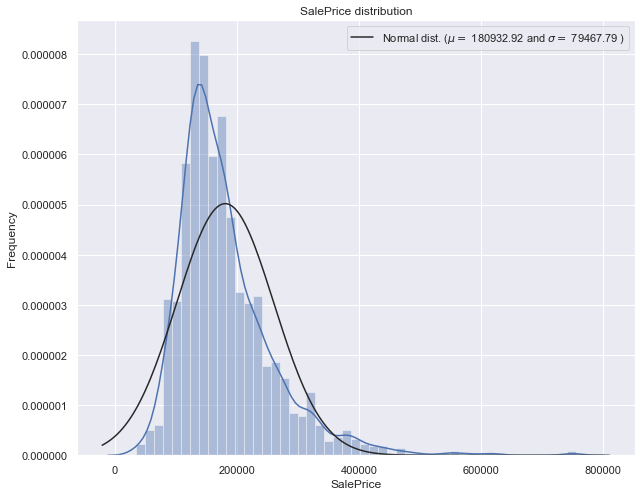

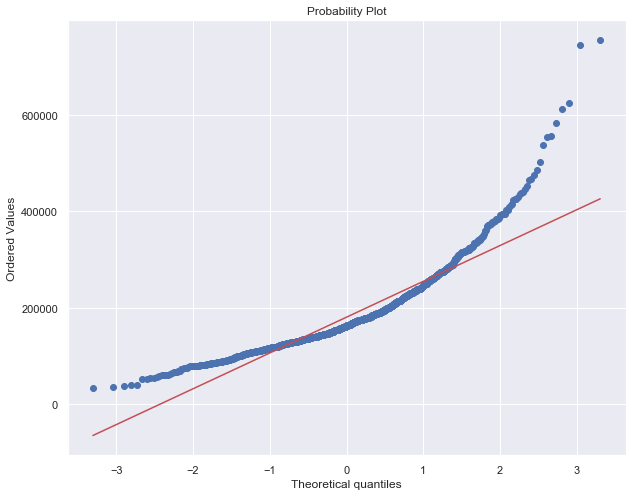

In [66]:
sns.distplot(target, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



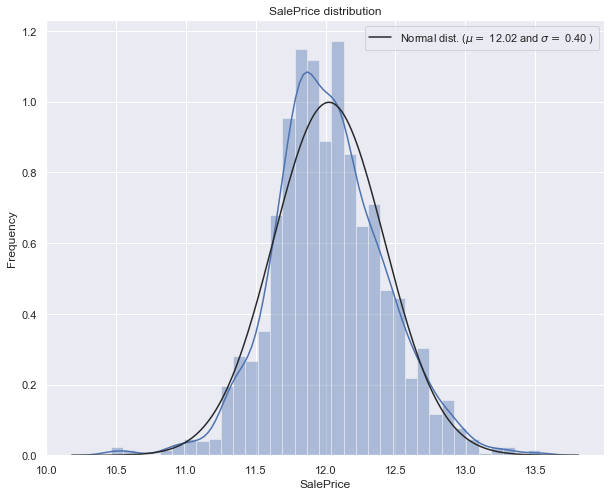

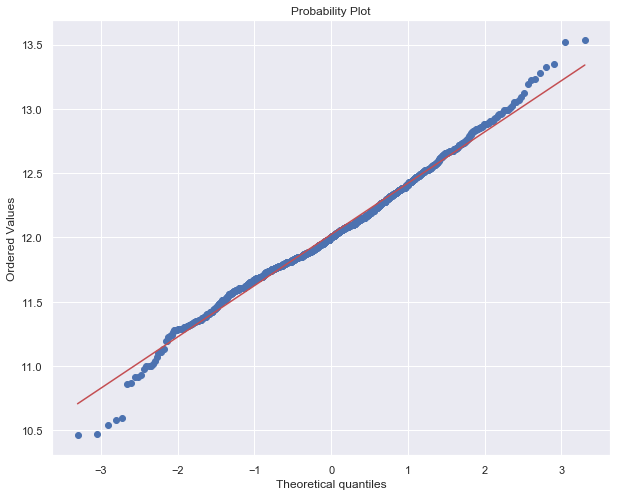

In [67]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
target_log = np.log1p(target)

#Check the new distribution 
sns.distplot(target_log, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target_log)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target_log, plot=plt)
plt.show()

As you can see, our distrobution is much more normal and the Q-Q Plot (the bottom graphs) show how far a distrobution is from normal 
by fitting it to a straight line. Looks like we are much more on target now. 

### But will that actually help predictions? 

back_from_log = np.expm1(target_log)

In [68]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(train, target_log, test_size=0.33, random_state=42)

In [69]:
log3 = LinearRegression()
log3 = log3.fit(X_trainL,y_trainL)
y_predL = log3.score(X_testL,y_testL)
ttreeL = log3.score(X_trainL, y_trainL)
predL = log3.predict(X_trainL)
predNL = np.expm1(predL)
predL_test = log3.predict(X_testL)
predNL_test = np.expm1(predL_test)

print("Training score of Reg Model",ttreeL)
print("Testing Score of Reg Model",y_predL)
print(f'\nTraining RMSE of Reg model: {rmse(predNL,y_trainL)}')
print(f'Testing RMSE of Reg model: {rmse(predNL_test,y_testL)}')
print(f'\nTraining MAE of Reg model: {mae(predNL,y_trainL)}')
print(f'Testing MAE of Reg model: {mae(predNL_test,y_testL)}')

Training score of Reg Model 0.9423357777432163
Testing Score of Reg Model 0.9035845234807971

Training RMSE of Reg model: 196639.27757447126
Testing RMSE of Reg model: 194204.96997269287

Training MAE of Reg model: 180651.6470673946
Testing MAE of Reg model: 178897.4204546999


In [70]:
treeL = RandomForestRegressor()
treeL = treeL.fit(X_trainL,y_trainL)
y_predLF = treeL.score(X_testL,y_testL)
ttreeLF = treeL.score(X_trainL, y_trainL)
predLF = treeL.predict(X_trainL)
predNLF = np.expm1(predLF)
predL_testF = treeL.predict(X_testL)
predNL_testF = np.expm1(predL_testF)


print("Training score of Forest Model",ttreeLF)
print("Testing Score of Forest Model",y_predLF)
print(f'\nTraining RMSE of Forest model: {rmse(predNLF,y_trainL)}')
print(f'Testing RMSE of Forest model: {rmse(predNL_testF,y_testL)}')
print(f'\nTraining MAE of Forest model: {mae(predNLF,y_trainL)}')
print(f'Testing MAE of Forest model: {mae(predNL_testF,y_testL)}')

Training score of Forest Model 0.9827479570166703
Testing Score of Forest Model 0.8806246635403544

Training RMSE of Forest model: 194775.78097424863
Testing RMSE of Forest model: 190786.68777470943

Training MAE of Forest model: 179954.73670582002
Testing MAE of Forest model: 178018.95466513623


We have basically flipped the results on their head. Our transformation has hurt the RF model, and has helped the linear model.
We always have to make decisions in our DS projects that will have large impacts on our outputs

In [124]:
tester = np.expm1(y_testL)

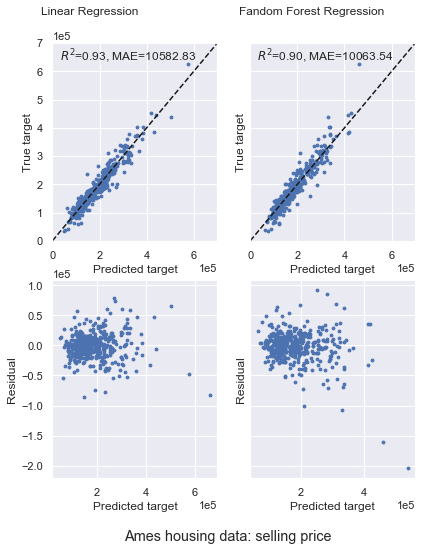

In [125]:
from sklearn.metrics import median_absolute_error, r2_score
f, (ax0, ax1) = plt.subplots(2, 2, sharey='row', figsize=(6.5, 8))

ax0[0].scatter(predNL_test, tester, s=8)
ax0[0].plot([0, 7e5], [0, 7e5], '--k')
ax0[0].set_ylabel('True target')
ax0[0].set_xlabel('Predicted target')
ax0[0].text(s='Linear Regression', x=-5e4,
            y=8e5, fontsize=12, multialignment='center')
ax0[0].text(3e4, 64e4, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(tester, predNL_test), median_absolute_error(tester, predNL_test)))
ax0[0].set_xlim([0, 7e5])
ax0[0].set_ylim([0, 7e5])
ax0[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[0].scatter(predNL_test, (predNL_test - tester), s=8)
ax1[0].set_ylabel('Residual')
ax1[0].set_xlabel('Predicted target')
ax1[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax0[1].scatter(predNL_testF, tester, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], '--k')
ax0[1].set_ylabel('True target')
ax0[1].set_xlabel('Predicted target')
ax0[1].text(s='Fandom Forest Regression', x=-5e4,
            y=8e5, fontsize=12, multialignment='center')
ax0[1].text(3e4, 64e4, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(tester, predNL_testF), median_absolute_error(tester, predNL_testF)))
ax0[1].set_xlim([0, 7e5])
ax0[1].set_ylim([0, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[1].scatter(predNL_testF, (predNL_testF - tester), s=8)
ax1[1].set_ylabel('Residual')
ax1[1].set_xlabel('Predicted target')
ax1[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

f.suptitle("Ames housing data: selling price", y=0.035)

plt.show()

LOOK! our residuals are streghtened, and our R^2 is up!

We are much more toward the path that we want, even beating our RF algorithm.

## Model Simplification

Lets see if we can make a better and simpler model in a different way.

We tried only selecting correlated values, and did pretty well, are there other options.

We have three major shoices here:

1.) Univariate/Filter based Selection -- Choosing features ourselves by how they impact the model in some way (correlation)

2.) Wrapper Methods -- Uses one single ML algorithm and uses its performance as evaluation criteria, 
                        we chooses features based on their influence on preformance. (p-value of feature importance)

3.) Embedded Methods -- Repeadedly tries different combinations of features to achieve the best feature set. 

We have tried #1 before without too much success,
So lets build a model with #2, we are going to take out the pvalues of each predictive column,
then filter for ones that have impact on the output. 

In [73]:
selected_columns = X_trainL.columns
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

SL = 0.02
data_modeled, selected_columns = backwardElimination(X_trainL.iloc[:,1:].values, y_trainL.values, SL, selected_columns)

In [74]:
selected_columns

Index([ 'LotFrontage',      'LotArea',    'LandSlope',  'OverallQual',
        'OverallCond',     'BsmtCond', 'BsmtFinType1',    'BsmtUnfSF',
        'TotalBsmtSF',    'HeatingQC', 'LowQualFinSF',    'GrLivArea',
           'HalfBath', 'KitchenAbvGr',   'Functional', 'GarageFinish',
         'GarageArea',   'GarageCond',       'YrSold',     'TOT_bath',
            'C (all)',           'FV',           'RH',           'RL',
                 'RM',             50,             60,             80,
                   85,      'CollgCr',      'NoRidge',      'Somerst',
            'Veenker',         '1Fam',       '2fmCon',       'Duplex',
              'Twnhs',       'TwnhsE',       '1.5Fin',       '1.5Unf',
             '1Story',       '2.5Fin',       '2.5Unf',       '2Story',
             'SFoyer',       'Detchd',      'Abnorml',      'AdjLand',
             'Alloca',       'Family',       'Normal',      'Partial',
                'COD',          'CWD',          'Con',        'ConLD',
      

In [75]:
X_train_s = X_trainL[selected_columns]
X_test_s = X_testL[selected_columns]
y_train_s = y_trainL
y_test_s = y_testL


In [76]:
#fitting the model to the data
reg_s = reg.fit(X_train_s,y_train_s)
#Score the results
reg = reg.fit(X_train_s,y_train_s)
y_pred = reg.score(X_test_s,y_test_s)
ttree = reg.score(X_train_s, y_train_s)
pred_train = reg.predict(X_train_s)
pred = np.expm1(pred_train)
pred_test = reg.predict(X_test_s)
pret = np.expm1(pred_test)
print("Training score of Regression Model",ttree)
print("Testing Score of Regression Model",y_pred)
print(f'\nTraining RMSE of model: {rmse(pred,y_train_s)}')
print(f'Testing RMSE of model: {rmse(pret,y_test_s)}')

Training score of Regression Model 0.9194197416656676
Testing Score of Regression Model 0.903232781111424

Training RMSE of model: 196015.36820684766
Testing RMSE of model: 195936.02081011675


In [77]:
#just for comparisons sake this is the old model with lots of features
log3 = LinearRegression()
log3 = log3.fit(X_trainL,y_trainL)
y_predL = log3.score(X_testL,y_testL)
ttreeL = log3.score(X_trainL, y_trainL)
predL = log3.predict(X_trainL)
predNL = np.expm1(predL)
predL_test = log3.predict(X_testL)
predNL_test = np.expm1(predL_test)

print("Training score of Reg Model",ttreeL)
print("Testing Score of Reg Model",y_predL)
print(f'\nTraining RMSE of Reg model: {rmse(predNL,y_trainL)}')
print(f'Testing RMSE of Reg model: {rmse(predNL_test,y_testL)}')
print(f'\nTraining MAE of Reg model: {mae(predNL,y_trainL)}')
print(f'Testing MAE of Reg model: {mae(predNL_test,y_testL)}')

Training score of Reg Model 0.9423357777432163
Testing Score of Reg Model 0.9035845234807971

Training RMSE of Reg model: 196639.27757447126
Testing RMSE of Reg model: 194204.96997269287

Training MAE of Reg model: 180651.6470673946
Testing MAE of Reg model: 178897.4204546999


In [78]:
X_trainL.shape

(976, 159)

In [79]:
X_train_s.shape

(976, 82)

Thinking about model size is always important, 
optimizing to a smaller model usually means more consistant results (less testing error)
as well as quicker predictions.

Looks like there is a good way to optimize this model fo speed as well!

## Fine Tuning the Model Hyperperameters

In [80]:
from sklearn.model_selection import GridSearchCV

In [126]:
models = { 
    'TTR': TransformedTargetRegressor()}

params = {
    'TTR': {
        'regressor':  [ 
            LassoLars(alpha=0.001),
            LassoLars(alpha=0.01),
            LassoLars(alpha=0.1),
            LassoLars(alpha=1),
            LassoLars(alpha=10),
            Ridge(alpha=1),
            Ridge(alpha=6),
            Ridge(alpha=8),
            Ridge(alpha=10),
            Ridge(alpha=12),
            Ridge(alpha=30),
            ElasticNet(alpha=0.001),
            ElasticNet(alpha=0.01),
            ElasticNet(alpha=0.1),
            ElasticNet(alpha=1),
            ElasticNet(alpha=10),
            ElasticNet(alpha=100),
            HuberRegressor(alpha=0.001),
            HuberRegressor(alpha=0.01),
            HuberRegressor(alpha=0.1),
            HuberRegressor(alpha=1),
            HuberRegressor(alpha=10),
            HuberRegressor(alpha=100)],
        'transformer': [QuantileTransformer(n_quantiles=750,output_distribution='normal'),
                       QuantileTransformer(n_quantiles=300,output_distribution='normal')]},
        'regressor__alpha': [1,10]
}

In [127]:
class EstimatorSelectionHelper:
    
    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X, y, **grid_kwargs):
        for key in self.keys:
            print('Running GridSearchCV for %s.' % key)
            model = self.models[key]
            params = self.params[key]
            grid_search = GridSearchCV(model, params, cv=5, **grid_kwargs)
            grid_search.fit(X, y)
            self.grid_searches[key] = grid_search
        print('Done.')
    
    def score_summary(self, sort_by='mean_test_score'):
        frames = []
        for name, grid_search in self.grid_searches.items():
            frame = pd.DataFrame(grid_search.cv_results_)
            frame = frame.filter(regex='^(?!.*param_).*$')
            frame['estimator'] = len(frame)*[name]
            frames.append(frame)
        df = pd.concat(frames)
        
        df = df.sort_values([sort_by], ascending=False)
        df = df.reset_index()
        df = df.drop(['rank_test_score', 'index'], 1)
        
        columns = df.columns.tolist()
        columns.remove('estimator')
        columns = ['estimator']+columns
        df = df[columns]
        return df

In [128]:
helper1 = EstimatorSelectionHelper(models, params)
helper1.fit(X_train_s, y_train_s, scoring='r2', n_jobs=1)
helper1.score_summary().head(20)

Running GridSearchCV for TTR.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 16 iterations, i.e. alpha=1.871e-03, with an active set of 16 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 24 iterations, i.e. alpha=1.459e-03, with an active set of 24 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regresso

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

Done.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


estimator  mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        TTR       0.011002      0.001673         0.003998        0.001546   
1        TTR       0.012600      0.002154         0.003800        0.000748   
2        TTR       0.021197      0.002990         0.004204        0.000983   
3        TTR       0.011405      0.001499         0.003994        0.001264   
4        TTR       0.011799      0.002037         0.004798        0.001166   
5        TTR       0.010599      0.001020         0.004801        0.001168   
6        TTR       0.010801      0.001159         0.004998        0.001416   
7        TTR       0.011204      0.001601         0.003798        0.000747   
8        TTR       0.024186      0.002303         0.004215        0.001177   
9        TTR       0.010202      0.000983         0.004998        0.000629   
10       TTR       0.010803      0.000747         0.003997        0.001097   
11       TTR       0.012396      0.002873         0.003403        0.000811   
12       TTR       0.013983      0.002099         0.004408        0.001362   
13       TTR       0.012999      0.001548         0.003800        0.000747   
14       TTR       0.013003      0.002453         0.005197        0.000749   
15       TTR       0.010800      0.002225         0.004401        0.001361   
16       TTR       0.029200      0.004667         0.006201        0.001718   
17       TTR       0.028001      0.004335         0.005600        0.001497   
18       TTR       0.013001      0.002191         0.004196        0.001165   
19       TTR       0.011597      0.000805         0.005005        0.001420   

                                               params  split0_test_score  \
0   {'regressor': Ridge(alpha=30), 'transformer': ...           0.867945   
1   {'regressor': Ridge(alpha=30), 'transformer': ...           0.865910   
2   {'regressor': ElasticNet(alpha=0.001), 'transf...           0.856415   
3   {'regressor': Ridge(alpha=12), 'transformer': ...           0.856969   
4   {'regressor': Ridge(alpha=12), 'transformer': ...           0.859471   
5   {'regressor': Ridge(alpha=10), 'transformer': ...           0.856867   
6   {'regressor': Ridge(alpha=10), 'transformer': ...           0.858873   
7   {'regressor': Ridge(alpha=8), 'transformer': Q...           0.856075   
8   {'regressor': ElasticNet(alpha=0.001), 'transf...           0.856466   
9   {'regressor': Ridge(alpha=8), 'transformer': Q...           0.857555   
10  {'regressor': Ridge(alpha=6), 'transformer': Q...           0.855466   
11  {'regressor': Ridge(alpha=6), 'transformer': Q...           0.856675   
12  {'regressor': ElasticNet(alpha=0.01), 'transfo...           0.862441   
13  {'regressor': ElasticNet(alpha=0.01), 'transfo...           0.861298   
14  {'regressor': Ridge(alpha=1), 'transformer': Q...           0.853424   
15  {'regressor': Ridge(alpha=1), 'transformer': Q...           0.853113   
16  {'regressor': LassoLars(alpha=0.001), 'transfo...           0.858185   
17  {'regressor': LassoLars(alpha=0.001), 'transfo...           0.856122   
18  {'regressor': ElasticNet(alpha=0.1), 'transfor...           0.844701   
19  {'regressor': ElasticNet(alpha=0.1), 'transfor...           0.845315   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.898702           0.903143           0.901055   
1            0.897922           0.902854           0.899473   
2            0.894497           0.911329           0.904271   
3            0.898260           0.904498           0.901605   
4            0.897804           0.904674           0.899616   
5            0.897997           0.904514           0.901523   
6            0.897598           0.905060           0.899544   
7            0.897675           0.904625           0.901608   
8            0.894258           0.911113           0.902870   
9            0.897135           0.905393           0.899434   
10           0.897014           0.905251           0.901364   
11         

In [129]:
helper1 = EstimatorSelectionHelper(models, params)
helper1.fit(X_train3, y_train3, scoring='r2', n_jobs=1)
helper1.score_summary().head(20)

Running GridSearchCV for TTR.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 41 iterations, i.e. alpha=1.110e-03, with an active set of 41 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 26 iterations, i.e. alpha=2.278e-03, with an active set of 26 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regresso

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Done.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


estimator  mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        TTR       0.014998      0.002971         0.004788        0.001152   
1        TTR       0.013203      0.001470         0.006396        0.001625   
2        TTR       0.012402      0.001016         0.006396        0.001202   
3        TTR       0.014604      0.002057         0.004398        0.000490   
4        TTR       0.037800      0.008237         0.005199        0.001169   
5        TTR       0.013999      0.001426         0.005402        0.001373   
6        TTR       0.014204      0.001720         0.005797        0.001724   
7        TTR       0.013805      0.000749         0.005396        0.001360   
8        TTR       0.020807      0.014743         0.004594        0.001201   
9        TTR       0.038208      0.002708         0.004594        0.001202   
10       TTR       0.013805      0.001163         0.005194        0.001166   
11       TTR       0.014204      0.001719         0.005395        0.001741   
12       TTR       0.041197      0.005524         0.009601        0.004226   
13       TTR       0.031605      0.006836         0.005197        0.000979   
14       TTR       0.019005      0.002104         0.006195        0.001162   
15       TTR       0.013202      0.002040         0.004602        0.000799   
16       TTR       0.017199      0.002403         0.005001        0.000635   
17       TTR       0.012999      0.001256         0.004393        0.000488   
18       TTR       0.019398      0.012832         0.005002        0.000897   
19       TTR       0.020001      0.007618         0.004999        0.001546   

                                               params  split0_test_score  \
0   {'regressor': Ridge(alpha=8), 'transformer': Q...           0.927256   
1   {'regressor': Ridge(alpha=6), 'transformer': Q...           0.927308   
2   {'regressor': Ridge(alpha=10), 'transformer': ...           0.926583   
3   {'regressor': Ridge(alpha=12), 'transformer': ...           0.925619   
4   {'regressor': ElasticNet(alpha=0.001), 'transf...           0.928990   
5   {'regressor': Ridge(alpha=8), 'transformer': Q...           0.927823   
6   {'regressor': Ridge(alpha=6), 'transformer': Q...           0.927601   
7   {'regressor': Ridge(alpha=10), 'transformer': ...           0.927388   
8   {'regressor': Ridge(alpha=12), 'transformer': ...           0.926926   
9   {'regressor': ElasticNet(alpha=0.001), 'transf...           0.928101   
10  {'regressor': Ridge(alpha=30), 'transformer': ...           0.921564   
11  {'regressor': Ridge(alpha=30), 'transformer': ...           0.922866   
12  {'regressor': LassoLars(alpha=0.001), 'transfo...           0.908633   
13  {'regressor': LassoLars(alpha=0.001), 'transfo...           0.909230   
14  {'regressor': ElasticNet(alpha=0.01), 'transfo...           0.911815   
15  {'regressor': Ridge(alpha=1), 'transformer': Q...           0.929151   
16  {'regressor': ElasticNet(alpha=0.01), 'transfo...           0.911286   
17  {'regressor': Ridge(alpha=1), 'transformer': Q...           0.928252   
18  {'regressor': ElasticNet(alpha=0.1), 'transfor...           0.868982   
19  {'regressor': ElasticNet(alpha=0.1), 'transfor...           0.873884   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.922033           0.931055           0.881088   
1            0.922811           0.931142           0.879915   
2            0.921559           0.930999           0.881152   
3            0.920895           0.930716           0.881805   
4            0.922546           0.931733           0.874981   
5            0.921322           0.930827           0.877616   
6            0.922048           0.930841           0.876854   
7            0.920776           0.930682           0.877758   
8            0.920034           0.930465           0.878003   
9            0.921872           0.931853           0.872669   
10           0.917062           0.930084           0.878720   
11         

After repeated cross validation, our model selection tool shows us two things, one, that Ridge() trasformer is better than our standard LinearRegression,
and also, that having more features "in this case" helped.
Probably why: Ridge Regression actually attempts to limit the number of varables that are allowed to contribute to the model. 
Therefore, it is limiting the features interally and scoring off that.

In [130]:
helper1.score_summary().params[0]

{'regressor': Ridge(alpha=8),
 'transformer': QuantileTransformer(n_quantiles=750, output_distribution='normal')}

In [86]:
regr_trans3 = TransformedTargetRegressor(
    regressor= ElasticNet(alpha=0.001),
    transformer=QuantileTransformer(n_quantiles=750,
                                    output_distribution='normal'))

In [131]:
regr_trans = TransformedTargetRegressor(
    regressor= Ridge(alpha=8),
    transformer=QuantileTransformer(n_quantiles=750,
                                    output_distribution='normal'))

In [132]:
regr_trans3 = regr_trans3.fit(X_train3,y_train3)
y_pred = regr_trans3.score(X_test3,y_test3)
ttree = regr_trans3.score(X_train3, y_train3)
pred_train = regr_trans3.predict(X_train3)
pred_test = regr_trans3.predict(X_test3)
print("Training score of Tree Model",y_pred)
print("Testing Score of Tree Model",ttree)
print(f'\nTraining RMSE of model: {rmse(pred_train,y_train3)}')
print(f'Testing RMSE of model: {rmse(pred_test,y_test3)}')
print(f'\nTraining MAE of Reg model: {mae(pred_train,y_train3)}')
print(f'Testing MAE of Reg model: {mae(pred_test,y_test3)}')

Training score of Tree Model 0.9385258647395998
Testing Score of Tree Model 0.943198602641329

Training RMSE of model: 19143.952696016528
Testing RMSE of model: 19263.041860824804

Training MAE of Reg model: 12521.07240595473
Testing MAE of Reg model: 13488.130567545315


In [133]:
regr_trans = regr_trans.fit(X_train3,y_train3)
y_pred = regr_trans.score(X_test3,y_test3)
ttree = regr_trans.score(X_train3, y_train3)
pred_train = regr_trans.predict(X_train3)
pred_test = regr_trans.predict(X_test3)
print("Training score of Tree Model",y_pred)
print("Testing Score of Tree Model",ttree)
print(f'\nTraining RMSE of model: {rmse(pred_train,y_train3)}')
print(f'Testing RMSE of model: {rmse(pred_test,y_test3)}')
print(f'\nTraining MAE of Reg model: {mae(pred_train,y_train3)}')
print(f'Testing MAE of Reg model: {mae(pred_test,y_test3)}')

Training score of Tree Model 0.9388085191360953
Testing Score of Tree Model 0.9414928412738075

Training RMSE of model: 19429.27550615741
Testing RMSE of model: 19218.705681259507

Training MAE of Reg model: 12666.123256281553
Testing MAE of Reg model: 13588.738864063589


So awesome! Let's save this for later!

In [90]:
import pickle
pickle.dump(regr_trans, open('FinalModel.sav', 'wb'))

In [91]:
with open('FinalModel.sav', "rb") as f:
        SavedModel = pickle.load(f)
did_I_save=SavedModel

In [92]:
did_I_save

TransformedTargetRegressor(regressor=Ridge(alpha=10),
                           transformer=QuantileTransformer(n_quantiles=750,
                                                           output_distribution='normal'))

In [93]:
def fil_zero(df):
    df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
    df['MasVnrArea']=df['MasVnrArea'].fillna(0)
    df['LotFrontage']=df['LotFrontage'].fillna(0)
    df['MasVnrType']=df['MasVnrType'].fillna("None")
    return df

def fix_cat_feat(df):
    df['Alley']=df['Alley'].apply(lambda x: 1 if x!=0 else 0)
    df['LotShape']=df['LotShape'].apply(lambda x: 1 if x=='Reg' or x=='IR1' else 0)
    df['LandContour']=df['LandContour'].apply(lambda x: 1 if x=='Lvl' else 0)
    df['Utilities']=df['Utilities'].apply(lambda x: 1 if x=='AllPub' or x=='NoSewr' else 0)
    df['LotConfig']=df['LotConfig'].apply(lambda x: 1 if x=='Inside' or x=='CulDSac' else 0)
    df['LotConfig']=df['LotConfig'].apply(lambda x: 1 if x=='Inside' or x=='CulDSac' else 0)

    df['LandSlope']=df['LandSlope'].apply(lambda x: 1 if x=='Gtl' else 0)
    df['ExterQual']=df['ExterQual'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else 1))))
    df['ExterCond']=df['ExterCond'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else 1))))
    df['BsmtQual']=df['BsmtQual'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
    df['BsmtCond']=df['BsmtCond'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
    df['BsmtExposure']=df['BsmtExposure'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
    df['BsmtFinType1']=df['BsmtFinType1'].apply(lambda x: 5 if x=='GLQ' else (4 if x=='ALQ' else (3 if x=='BLQ' else (2 if x=='Rec' else (1 if x=='LwQ' else 0)))))
    df['BsmtFinType2']=df['BsmtFinType2'].apply(lambda x: 5 if x=='GLQ' else (4 if x=='ALQ' else (3 if x=='BLQ' else (2 if x=='Rec' else (1 if x=='LwQ' else 0)))))
    df['HeatingQC']=df['HeatingQC'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
    df['CentralAir']=df['CentralAir'].apply(lambda x: 1 if x=='Y' else 0)
    df['KitchenQual']=df['KitchenQual'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else 1))))
    df['Functional']=df['Functional'].apply(lambda x: 5 if x=='GLQ' else (4 if x=='ALQ' else (3 if x=='BLQ' else (2 if x=='Rec' else (1 if x=='LwQ' else 0)))))
    df['TOT_bath']=df['FullBath']+(.5*df['HalfBath'])
    df['FireplaceQu']=df['FireplaceQu'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
    df['GarageFinish']=df['GarageFinish'].apply(lambda x: 3 if x=='Fin' else (2 if x=='RFn' else (1 if x=='Unf' else 0)))
    df['GarageQual']=df['GarageQual'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
    df['GarageCond']=df['GarageCond'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
    df['PavedDrive']=df['PavedDrive'].apply(lambda x: 1 if x=='Y' or x=='P' else 0)
    df['PoolQC']=df['PoolQC'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
    df['Fence']=df['Fence'].apply(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='TA' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
    return df

def fix_dummies(df):
    df=pd.concat([df,pd.get_dummies(df.MSZoning)],axis=1)
    df.drop(columns=('MSZoning'),inplace=True)

    df=pd.concat([df,pd.get_dummies(df.MSSubClass)],axis=1)
    df.drop(columns=('MSSubClass'),inplace=True)

    df=pd.concat([df,pd.get_dummies(df.Neighborhood)],axis=1)
    df.drop(columns=('Neighborhood'),inplace=True)

    df=pd.concat([df,pd.get_dummies(df.BldgType)],axis=1)
    df.drop(columns=('BldgType'),inplace=True)

    df=pd.concat([df,pd.get_dummies(df.HouseStyle)],axis=1)
    df.drop(columns=('HouseStyle'),inplace=True)

    df=pd.concat([df,pd.get_dummies(df.GarageType)],axis=1)
    df.drop(columns=('GarageType'),inplace=True)

    df=pd.concat([df,pd.get_dummies(df.SaleCondition)],axis=1)
    df.drop(columns=('SaleCondition'),inplace=True)

    df=pd.concat([df,pd.get_dummies(df.SaleType)],axis=1)
    df.drop(columns=('SaleType'),inplace=True)

    df=pd.concat([df,pd.get_dummies(df.Condition1)],axis=1)
    df.drop(columns=('Condition1'),inplace=True)

    df=pd.concat([df,pd.get_dummies(df.MasVnrType)],axis=1)
    df.drop(columns=('MasVnrType'),inplace=True)

    df=pd.concat([df,pd.get_dummies(df.Foundation)],axis=1)
    df.drop(columns=('Foundation'),inplace=True)

    df.reset_index(inplace=True)
    df=df.drop(columns=['Id','Street','Condition2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'Heating',
                              'Electrical','MiscFeature'])
    return df

def years_transform(df):
    for column in ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']:
        df[column]=df[column]-(df[column].min()-1)
        df[column]=df[column].apply(lambda x: 0 if x==0 else np.log10(x))
    return df

In [94]:
url = 'https://raw.githubusercontent.com/ChristianRLynn/DataSets/main/train.csv'
raw = pd.read_csv(url, error_bad_lines=False); raw.drop(columns='SalePrice',inplace=True)

first = fil_zero(raw)

second = fix_cat_feat(first)

third = fix_dummies(second)

fourth = years_transform(third)

In [95]:
with open('FinalModel.sav', "rb") as f:
        SavedModel = pickle.load(f)
did_I_save=SavedModel

In [96]:
did_I_save.predict(third)[1:500]

array([194528.58101163, 219695.39040011, 184048.90800749, 285903.07659366,
       155575.63505491, 279531.52550151, 230336.46281917, 128990.44535177,
       128101.81234231, 129000.        , 396157.8701443 , 130679.87932317,
       228533.41249635, 149844.97264218, 134922.03778028, 150712.28628483,
       110000.        , 145959.31110936, 125000.        , 325000.        ,
       129844.16109876, 231354.24220402, 139473.83880257, 144000.        ,
       240989.35517169, 132822.376739  , 280663.73203081, 180841.83332959,
        76232.54410527,  81007.27721785, 136411.86669565, 183091.63597847,
       167106.34463056, 271125.49019589, 317199.13509721, 147359.67831506,
       154000.        , 127000.        ,  80000.        , 143299.12222038,
       167000.        , 142948.02163928, 127500.        , 136500.45310946,
       279536.49497228, 241738.90441361, 239952.37702948,  92960.48775954,
       134938.60109473, 169999.4125639 , 129370.62321157, 104976.55763384,
       381080.00956005, 1

# That's All Folks! We have a model saved!
## Trughfully there is a lot to discuss about creating model pipelines and model deployment,
## but, so little time, so much fun left. 
THANKS!

# Extra FUN

In [97]:
log_col_list=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
              'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
              'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
              'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
train2=log_trans(train,log_col_list)

In [98]:
years_column=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
train2=year_transform(train2,years_column)

In [99]:
train2.shape

(1458, 159)

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train3=scaler.fit_transform(train2)
train3=pd.DataFrame(data=train3,    # values
              index=train2.index,    # 1st column as index
              columns=train2.columns)

In [101]:
train3.shape

(1458, 159)

In [102]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(train3, target, test_size=0.33, random_state=42)

In [103]:
X_train4l, X_test4l, y_train4l, y_test4l = train_test_split(train3, target_log, test_size=0.33, random_state=42)

In [104]:
tree = RandomForestRegressor()
tree = tree.fit(X_train4,y_train4)
y_pred4 = tree.score(X_test4,y_test4)
ttree4 = tree.score(X_train4, y_train4)
pred4_train = tree.predict(X_train4)
pred4_test = tree.predict(X_test4)
print("Training score of Tree Model",ttree4)
print("Testing Score of Tree Model",y_pred4)
print(f'\nTraining RMSE of model: {rmse(pred4_train,y_train4)}')
print(f'Testing RMSE of model: {rmse(pred4_test,y_test4)}')

Training score of Tree Model 0.9818829416927566
Testing Score of Tree Model 0.9010531748736011

Training RMSE of model: 10811.74872131708
Testing RMSE of model: 24438.783614932207


In [105]:
treel = RandomForestRegressor()
treel = treel.fit(X_train4l,y_train4l)
y_pred4l = treel.score(X_test4l,y_test4l)
ttree4l = treel.score(X_train4l, y_train4l)
pred4_trainl = tree.predict(X_train4l)
pred4_testl = tree.predict(X_test4l)
print("Training score of Tree Model",ttree4)
print("Testing Score of Tree Model",y_pred4)
print(f'\nTraining RMSE of model: {rmse(pred4_trainl,y_train4l)}')
print(f'Testing RMSE of model: {rmse(pred4_testl,y_test4l)}')

Training score of Tree Model 0.9818829416927566
Testing Score of Tree Model 0.9010531748736011

Training RMSE of model: 196595.09420779278
Testing RMSE of model: 193568.20247447526


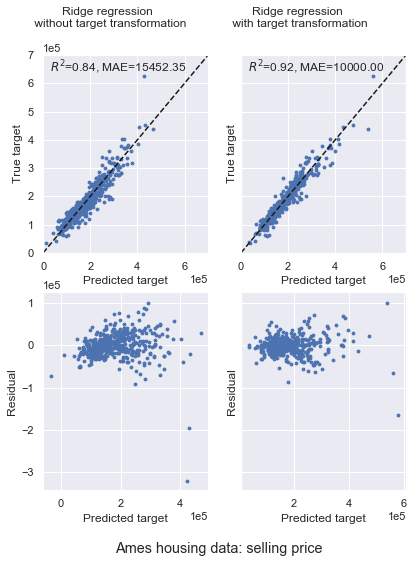

In [106]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import QuantileTransformer, quantile_transform

f, (ax0, ax1) = plt.subplots(2, 2, sharey='row', figsize=(6.5, 8))

regr = RidgeCV()
regr.fit(X_train4, y_train4)
y_pred = regr.predict(X_test4)

ax0[0].scatter(y_pred, y_test4, s=8)
ax0[0].plot([0, 7e5], [0, 7e5], '--k')
ax0[0].set_ylabel('True target')
ax0[0].set_xlabel('Predicted target')
ax0[0].text(s='Ridge regression \n without target transformation', x=-5e4,
            y=8e5, fontsize=12, multialignment='center')
ax0[0].text(3e4, 64e4, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test4, y_pred), median_absolute_error(y_test4, y_pred)))
ax0[0].set_xlim([0, 7e5])
ax0[0].set_ylim([0, 7e5])
ax0[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[0].scatter(y_pred, (y_pred - y_test4), s=8)
ax1[0].set_ylabel('Residual')
ax1[0].set_xlabel('Predicted target')
ax1[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

regr_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(n_quantiles=900,
                                    output_distribution='normal'))
regr_trans.fit(X_train4, y_train4)
y_pred = regr_trans.predict(X_test4)

ax0[1].scatter(y_pred, y_test4, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], '--k')
ax0[1].set_ylabel('True target')
ax0[1].set_xlabel('Predicted target')
ax0[1].text(s='Ridge regression \n with target transformation', x=-5e4,
            y=8e5, fontsize=12, multialignment='center')
ax0[1].text(3e4, 64e4, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test4, y_pred), median_absolute_error(y_test4, y_pred)))
ax0[1].set_xlim([0, 7e5])
ax0[1].set_ylim([0, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[1].scatter(y_pred, (y_pred - y_test4), s=8)
ax1[1].set_ylabel('Residual')
ax1[1].set_xlabel('Predicted target')
ax1[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

f.suptitle("Ames housing data: selling price", y=0.035)

plt.show()

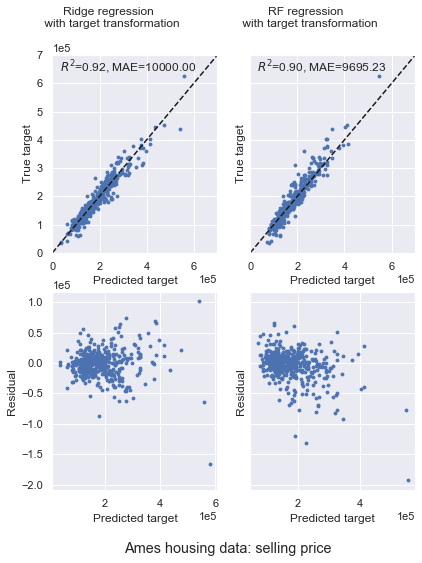

In [107]:
f, (ax0, ax1) = plt.subplots(2, 2, sharey='row', figsize=(6.5, 8))

regr = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(n_quantiles=900,
                                    output_distribution='normal'))
regr.fit(X_train4, y_train4)
y_pred = regr.predict(X_test4)

ax0[0].scatter(y_pred, y_test4, s=8)
ax0[0].plot([0, 7e5], [0, 7e5], '--k')
ax0[0].set_ylabel('True target')
ax0[0].set_xlabel('Predicted target')
ax0[0].text(s='Ridge regression \n with target transformation', x=-5e4,
            y=8e5, fontsize=12, multialignment='center')
ax0[0].text(3e4, 64e4, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test4, y_pred), median_absolute_error(y_test4, y_pred)))
ax0[0].set_xlim([0, 7e5])
ax0[0].set_ylim([0, 7e5])
ax0[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[0].scatter(y_pred, (y_pred - y_test4), s=8)
ax1[0].set_ylabel('Residual')
ax1[0].set_xlabel('Predicted target')
ax1[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

regr_trans = TransformedTargetRegressor(
    regressor= RandomForestRegressor(bootstrap='False',criterion='mae',max_depth=12,max_features=20,min_samples_split=2,n_estimators= 200),
    transformer=QuantileTransformer(n_quantiles=900,
                                    output_distribution='normal'))
regr_trans.fit(X_train4, y_train4)
y_pred = regr_trans.predict(X_test4)

ax0[1].scatter(y_pred, y_test4, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], '--k')
ax0[1].set_ylabel('True target')
ax0[1].set_xlabel('Predicted target')
ax0[1].text(s='RF regression \n with target transformation', x=-5e4,
            y=8e5, fontsize=12, multialignment='center')
ax0[1].text(3e4, 64e4, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test4, y_pred), median_absolute_error(y_test4, y_pred)))
ax0[1].set_xlim([0, 7e5])
ax0[1].set_ylim([0, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[1].scatter(y_pred, (y_pred - y_test4), s=8)
ax1[1].set_ylabel('Residual')
ax1[1].set_xlabel('Predicted target')
ax1[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

f.suptitle("Ames housing data: selling price", y=0.035)

plt.show()

### Does Feature Engineering actually do much??

In [108]:
def feat_engineering(df):
    df["porch_tot"]=df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']+df['WoodDeckSF']+df['OpenPorchSF']
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['base_bath_tot'] = df['BsmtFullBath'] + (df['BsmtFullBath']*.5)
    df['rooms_tot'] = df['TotalBsmtSF']/100 + df['TotRmsAbvGrd'] + df['base_bath_tot']
    df['sqr_ft_per_room'] = df['TotalSF']/df['rooms_tot']
    df["quality_add"]=df['KitchenQual']+df['GarageQual']+df['FireplaceQu']+df['HeatingQC']+df['BsmtQual']+df['ExterQual']+df['OverallQual']
    df["condition_add"]=df['KitchenQual']+df['GarageCond']+df['HeatingQC']+df['BsmtCond']+df['ExterCond']+df['OverallCond']
    df['metrics_add'] = df['condition_add']+df['quality_add']
    df["quality_add"]=df['KitchenQual']+df['GarageQual']+df['FireplaceQu']+df['HeatingQC']+df['BsmtQual']+df['ExterQual']+df['OverallQual']
    df["quality_mult"]=df['KitchenQual']*2 + df['GarageCond']*df['GarageQual'] + 2*df['HeatingQC']+df['BsmtQual']*df['BsmtCond']+df['ExterQual']*df['ExterCond']+df['OverallCond']*df['OverallQual']*2
    return df

In [109]:
tt=feat_engineering(train)

In [110]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(tt, target, test_size=0.33, random_state=42)

In [111]:
models = { 
    'TTR': TransformedTargetRegressor()}

params_closer = {
    'TTR': {
        'regressor':  [ 
            Ridge(alpha=6),
            Ridge(alpha=7),
            Ridge(alpha=8),
            Ridge(alpha=9),
            Ridge(alpha=10),
            Ridge(alpha=11),
            Ridge(alpha=12),
            Ridge(alpha=13),
            Ridge(alpha=14),
            Ridge(alpha=15),
            Ridge(alpha=16),
            ElasticNet(alpha=0.01),
            ElasticNet(alpha=0.1),
            ElasticNet(alpha=1),
            ElasticNet(alpha=10),
            HuberRegressor(alpha=0.01),
            HuberRegressor(alpha=0.1),
            HuberRegressor(alpha=1),
            HuberRegressor(alpha=10)],
        'transformer': [QuantileTransformer(n_quantiles=750,output_distribution='normal')]},
}

In [112]:
helper1 = EstimatorSelectionHelper(models, params_closer)
helper1.fit(X_train_full, y_train_full, scoring='r2', n_jobs=1)
helper1.score_summary().head(20)

Running GridSearchCV for TTR.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

Done.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


estimator  mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        TTR       0.024401      0.001626         0.008601        0.001018   
1        TTR       0.024002      0.001265         0.009999        0.002099   
2        TTR       0.023802      0.002227         0.007800        0.000749   
3        TTR       0.022402      0.002573         0.007801        0.000753   
4        TTR       0.021602      0.002870         0.006202        0.001165   
5        TTR       0.020804      0.002636         0.007796        0.000979   
6        TTR       0.021000      0.002098         0.007000        0.001096   
7        TTR       0.021204      0.003122         0.008597        0.000800   
8        TTR       0.021004      0.002098         0.006596        0.001498   
9        TTR       0.019798      0.002229         0.006401        0.001354   
10       TTR       0.021802      0.002638         0.007399        0.000490   
11       TTR       0.036801      0.002401         0.006405        0.001495   
12       TTR       0.024397      0.001959         0.006206        0.001166   
13       TTR       0.248997      0.031623         0.008602        0.000489   
14       TTR       0.224996      0.008875         0.009003        0.000001   
15       TTR       0.232201      0.036198         0.008803        0.000748   
16       TTR       0.215001      0.022119         0.007806        0.001603   
17       TTR       0.026197      0.002313         0.008002        0.001092   
18       TTR       0.019799      0.001468         0.007403        0.001356   

                                               params  split0_test_score  \
0   {'regressor': Ridge(alpha=6), 'transformer': Q...           0.927248   
1   {'regressor': Ridge(alpha=7), 'transformer': Q...           0.926513   
2   {'regressor': Ridge(alpha=8), 'transformer': Q...           0.925909   
3   {'regressor': Ridge(alpha=9), 'transformer': Q...           0.925149   
4   {'regressor': Ridge(alpha=10), 'transformer': ...           0.924265   
5   {'regressor': Ridge(alpha=11), 'transformer': ...           0.923082   
6   {'regressor': Ridge(alpha=12), 'transformer': ...           0.921958   
7   {'regressor': Ridge(alpha=13), 'transformer': ...           0.920730   
8   {'regressor': Ridge(alpha=14), 'transformer': ...           0.920018   
9   {'regressor': Ridge(alpha=15), 'transformer': ...           0.919392   
10  {'regressor': Ridge(alpha=16), 'transformer': ...           0.918807   
11  {'regressor': ElasticNet(alpha=0.01), 'transfo...           0.896445   
12  {'regressor': ElasticNet(alpha=0.1), 'transfor...           0.851055   
13  {'regressor': HuberRegressor(alpha=10), 'trans...           0.822481   
14  {'regressor': HuberRegressor(alpha=1), 'transf...           0.821738   
15  {'regressor': HuberRegressor(alpha=0.1), 'tran...           0.786650   
16  {'regressor': HuberRegressor(alpha=0.01), 'tra...           0.782009   
17  {'regressor': ElasticNet(alpha=1), 'transforme...           0.674737   
18  {'regressor': ElasticNet(alpha=10), 'transform...           0.277880   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.915727           0.910305           0.906856   
1            0.915390           0.909515           0.906308   
2            0.914782           0.908791           0.905342   
3            0.914062           0.908283           0.904244   
4            0.913108           0.907876           0.903584   
5            0.912239           0.907565           0.902959   
6            0.911564           0.907294           0.902090   
7            0.910832           0.907000           0.901294   
8            0.910025           0.906749           0.900700   
9            0.909232           0.906434           0.900180   
10           0.908606           0.906080           0.899632   
11           0.885303           0.900451           0.892963   
12           0.820330           0.862632           0.812494   
13           0.815685           0.83043

In [113]:
helper1.score_summary().params[0]

{'regressor': Ridge(alpha=6),
 'transformer': QuantileTransformer(n_quantiles=750, output_distribution='normal')}

In [114]:
regr_trans_full = TransformedTargetRegressor(
    regressor= Ridge(alpha=9),
    transformer=QuantileTransformer(n_quantiles=750,
                                    output_distribution='normal'))

In [115]:
regr_trans_full = regr_trans_full.fit(X_train_full,y_train_full)
y_pred = regr_trans_full.score(X_test_full,y_test_full)
ttree = regr_trans_full.score(X_train_full, y_train_full)
pred_train = regr_trans_full.predict(X_train_full)
pred_test = regr_trans_full.predict(X_test_full)
print("Training score of Tree Model",y_pred)
print("Testing Score of Tree Model",ttree)
print(f'\nTraining RMSE of model: {rmse(pred_train,y_train_full)}')
print(f'Testing RMSE of model: {rmse(pred_test,y_test_full)}')
print(f'\nTraining MAE of Reg model: {mae(pred_train,y_train_full)}')
print(f'Testing MAE of Reg model: {mae(pred_test,y_test_full)}')

Training score of Tree Model 0.9193734086484413
Testing Score of Tree Model 0.937288281807611

Training RMSE of model: 20115.29714980434
Testing RMSE of model: 22060.62457908701

Training MAE of Reg model: 13449.66427895107
Testing MAE of Reg model: 15183.34425500386


### Genetic Algos

Something I have been working on and very interested in ius GeneticSelection Algorithms
They offer a good chance of automating difficult parts of modeling

In [116]:
!pip install genetic_selection
from genetic_selection import GeneticSelectionCV
# create the GeneticSelection search with the different parameters available.
selection = GeneticSelectionCV(regr_trans_full,
                              cv=5,
                              scoring="r2",
                              max_features=20,
                              n_population=120,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=50,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              n_gen_no_change=10,
                              n_jobs=-1)

# fit the GA search to our data.
selection = selection.fit(X_train_full, y_train_full)

# print the results.
print(selection.support_)

ERROR: Could not find a version that satisfies the requirement genetic_selection (from versions: none)
ERROR: No matching distribution found for genetic_selection


[False False  True False False False False False False  True  True False
  True False False False False False  True False  True False False False
 False False False  True False False  True False False False False False
  True False False False False False False False  True False  True False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False  True False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False  True False
 False False False False False False False False False False False  True
 False False False False False False  True False  T

In [117]:
newsies=tt.loc[:, selection.support_ == True]

In [118]:
newsies.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtExposure',
       'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars',
       'GarageQual', 'TOT_bath', 'ClearCr', 'OldTown', '2fmCon', 'New', 'Norm',
       'PConc', 'rooms_tot', 'quality_add'],
      dtype='object')

In [119]:
X, X_t, y, y_t = train_test_split(newsies, target, test_size=0.33, random_state=42)

In [120]:
#just for comparisons sake this is the old baseline model with few features
log3 = LinearRegression()
log3 = log3.fit(X,y)
y_predL = log3.score(X_t,y_t)
ttreeL = log3.score(X, y)
predL = log3.predict(X)
#predNL = np.expm1(predL)
predL_test = log3.predict(X_t)
#predNL_test = np.expm1(predL_test)

print("Training score of Reg Model",ttreeL)
print("Testing Score of Reg Model",y_predL)
print(f'\nTraining RMSE of Reg model: {rmse(predL,y)}')
print(f'Testing RMSE of Reg model: {rmse(predL_test,y_t)}')
print(f'\nTraining MAE of Reg model: {mae(predL,y)}')
print(f'Testing MAE of Reg model: {mae(predL_test,y_t)}')

Training score of Reg Model 0.8460788665668972
Testing Score of Reg Model 0.8058035542352271

Training RMSE of Reg model: 31513.832977431175
Testing RMSE of Reg model: 34237.283008501305

Training MAE of Reg model: 21669.233376156135
Testing MAE of Reg model: 22963.908001658303


In [121]:
helper11 = EstimatorSelectionHelper(models, params_closer)
helper11.fit(X, y, scoring='r2', n_jobs=1)
helper11.score_summary().head(20)

Running GridSearchCV for TTR.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

Done.


estimator  mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        TTR       0.018804      0.001471         0.007106        0.002000   
1        TTR       0.019393      0.003553         0.006600        0.001202   
2        TTR       0.015205      0.000978         0.005197        0.001328   
3        TTR       0.014601      0.001854         0.003998        0.001267   
4        TTR       0.012996      0.001671         0.005001        0.000634   
5        TTR       0.012999      0.001999         0.004199        0.000979   
6        TTR       0.014802      0.002138         0.004799        0.000979   
7        TTR       0.021200      0.004579         0.013201        0.005808   
8        TTR       0.021003      0.001413         0.007199        0.000977   
9        TTR       0.022000      0.003156         0.007201        0.000976   
10       TTR       0.023200      0.004070         0.007399        0.001497   
11       TTR       0.020800      0.000979         0.007804        0.000750   
12       TTR       0.020602      0.000488         0.008000        0.001265   
13       TTR       0.090398      0.006835         0.006602        0.001743   
14       TTR       0.084798      0.005669         0.005003        0.001094   
15       TTR       0.114802      0.022182         0.005996        0.000007   
16       TTR       0.138601      0.093317         0.005800        0.002228   
17       TTR       0.017802      0.005268         0.004799        0.001166   
18       TTR       0.019600      0.006829         0.006000        0.001895   

                                               params  split0_test_score  \
0   {'regressor': Ridge(alpha=6), 'transformer': Q...           0.909067   
1   {'regressor': Ridge(alpha=7), 'transformer': Q...           0.908455   
2   {'regressor': Ridge(alpha=8), 'transformer': Q...           0.908128   
3   {'regressor': Ridge(alpha=9), 'transformer': Q...           0.907632   
4   {'regressor': Ridge(alpha=10), 'transformer': ...           0.907386   
5   {'regressor': Ridge(alpha=11), 'transformer': ...           0.907008   
6   {'regressor': Ridge(alpha=12), 'transformer': ...           0.906789   
7   {'regressor': Ridge(alpha=13), 'transformer': ...           0.906369   
8   {'regressor': Ridge(alpha=14), 'transformer': ...           0.905766   
9   {'regressor': Ridge(alpha=15), 'transformer': ...           0.905213   
10  {'regressor': Ridge(alpha=16), 'transformer': ...           0.904803   
11  {'regressor': ElasticNet(alpha=0.01), 'transfo...           0.900303   
12  {'regressor': ElasticNet(alpha=0.1), 'transfor...           0.864780   
13  {'regressor': HuberRegressor(alpha=10), 'trans...           0.865416   
14  {'regressor': HuberRegressor(alpha=1), 'transf...           0.860011   
15  {'regressor': HuberRegressor(alpha=0.01), 'tra...           0.862283   
16  {'regressor': HuberRegressor(alpha=0.1), 'tran...           0.859075   
17  {'regressor': ElasticNet(alpha=1), 'transforme...           0.728383   
18  {'regressor': ElasticNet(alpha=10), 'transform...          -0.068014   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.889613           0.909524           0.911412   
1            0.889290           0.908501           0.910164   
2            0.888740           0.907630           0.908681   
3            0.887959           0.906828           0.907303   
4            0.887163           0.906066           0.906317   
5            0.886106           0.905436           0.905227   
6            0.885301           0.904932           0.904167   
7            0.884875           0.904434           0.903137   
8            0.884298           0.903951           0.902001   
9            0.883310           0.903340           0.900952   
10           0.882452           0.902765           0.899750   
11           0.876404           0.902064           0.897638   
12           0.812378           0.861428           0.804479   
13           0.844404           0.83294

In [134]:
from sklearn.linear_model import Lasso
alphas=[0.001, 0.1, 2, 4, 6, 8, 10, 12, 14, 50]

models3 = { 
    'Linear': LinearRegression(),
    'Lars': LassoLars(),
    'RFReg': RandomForestRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'EN': ElasticNet(),
    'Huber': HuberRegressor()}

params3 = {
    'Linear':  {
        'normalize': ['True', 'False']},
    'Lars': {
        'fit_intercept': ['True'],
        'normalize': ['True', 'False'],
        'alpha': alphas,
        'eps': [0,10,20,30,40,50,60,70]},
    'RFReg': {
        'n_estimators': [30, 60, 90],
        'criterion': ['mse', 'mae'],
        'max_depth': [6, 12],
        'min_samples_split': [2, 5],
        'max_features': [3,7,10,'n_features'],
        'bootstrap': ['False']},
    'Lasso': {
        'alpha': [.5,1.0,2,10],
        'fit_intercept': ['False'],
        'normalize': ['False', 'True'],
        'max_iter': [50,500,1000,5000]},
    'Ridge': {"alpha": alphas},
    'EN': {
        'alpha': alphas,
        'l1_ratio': [0.25, 0.5, 0.75]},
    'Huber': {
        'alpha': alphas, 
        'epsilon': [1,1.35,1.9]}
}

In [135]:
helper11.score_summary().params[0]

{'regressor': Ridge(alpha=6),
 'transformer': QuantileTransformer(n_quantiles=750, output_distribution='normal')}

In [136]:
helper1 = EstimatorSelectionHelper(models3, params3)
helper1.fit(X_train3, y_train3, scoring='r2', n_jobs=1)
helper1.score_summary().head(20)

Running GridSearchCV for Linear.
Running GridSearchCV for Lars.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 76 iterations, i.e. alpha=2.589e+01, with an active set of 74 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 113 iterations, i.e. alpha=7.911e+00, with an active set of 103 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are smal

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 131 iterations, i.e. alpha=6.138e+00, with an active set of 117 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 132 iterations, i.e. alpha=6.091e+00, with an active set of 118 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are sm

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 95 iterations, i.e. alpha=2.108e+01, with an active set of 87 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 100 iterations, alpha=1.837e+01, previous alpha=1.825e+01, with an active set of 91 regressors.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 35 iterations, i.e

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 76 iterations, i.e. alpha=2.589e+01, with an active set of 74 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 113 iterations, i.e. alpha=7.911e+00, with an active set of 103 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are smal

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 132 iterations, i.e. alpha=6.091e+00, with an active set of 118 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 133 iterations, alpha=5.941e+00, previous alpha=5.874e+00, with an active set of 118 regressors.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 19 iterations, 

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 69 iterations, i.e. alpha=3.522e+01, with an active set of 65 regressors, and the smallest cholesky pivot element being 0.000e+00. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 90 iterations, i.e. alpha=1.754e+01, with an active set of 86 regressors, and the smallest cholesky pivot element being 0.000e+00. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regresso

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 76 iterations, i.e. alpha=2.589e+01, with an active set of 74 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 113 iterations, i.e. alpha=7.911e+00, with an active set of 103 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are smal

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 87 iterations, i.e. alpha=2.455e+01, with an active set of 79 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 95 iterations, i.e. alpha=2.108e+01, with an active set of 87 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small 

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.e. alpha=2.276e+02, with an active set of 19 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 57 iterations, i.e. alpha=4.458e+01, with an active set of 57 regressors, and the smallest cholesky pivot element being 0.000e+00. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regresso

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 106 iterations, alpha=1.242e+01, previous alpha=1.017e+01, with an active set of 101 regressors.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 76 iterations, i.e. alpha=2.589e+01, with an active set of 74 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 69 iterations, i.e. alpha=3.522e+01, with an active set of 65 regressors, and the smallest cholesky pivot element being 0.000e+00. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 90 iterations, i.e. alpha=1.754e+01, with an active set of 86 regressors, and the smallest cholesky pivot element being 0.000e+00. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regresso

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 90 iterations, i.e. alpha=1.754e+01, with an active set of 86 regressors, and the smallest cholesky pivot element being 0.000e+00. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 76 iterations, i.e. alpha=2.589e+01, with an active set of 74 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regresso

Running GridSearchCV for RFReg.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

Running GridSearchCV for Lasso.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169143868344.09174, tolerance: 502571291.99387383
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174995610546.11957, tolerance: 526223360.9566332
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98983393332.6097, tolerance: 477050504.74503964
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_m

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1626932160.548645, tolerance: 526223360.9566332
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5511961663.244141, tolerance: 504614368.70345384
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1626932160.548645, tolerance: 526223360.9566332
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_mod

Running GridSearchCV for Ridge.
Running GridSearchCV for EN.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195278080770.88574, tolerance: 502571291.99387383
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197895907532.47092, tolerance: 526223360.9566332
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174709236618.8587, tolerance: 477050504.74503964
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208814871542.5994, tolerance: 504614368.70345384
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227737732658.5804, tolerance: 507956711.09177417
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425059978692.111, tolerance: 502571291.99387383
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_mo

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386786445318.4227, tolerance: 526223360.9566332
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336242793926.4546, tolerance: 477050504.74503964
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359667187918.7789, tolerance: 504614368.70345384
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_mo

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481589991009.71533, tolerance: 507956711.09177417
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415324814311.06177, tolerance: 502571291.99387383
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431924370181.23, tolerance: 526223360.9566332
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_mo

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 486083789882.44525, tolerance: 477050504.74503964
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480696010338.704, tolerance: 504614368.70345384
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499042807593.4653, tolerance: 507956711.09177417
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_m

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 552142910889.5293, tolerance: 526223360.9566332
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524469548926.9611, tolerance: 477050504.74503964
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514911054474.00464, tolerance: 504614368.70345384
  positive)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_m

Running GridSearchCV for Huber.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

Done.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


estimator  mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       Lars       0.042999      0.004563         0.005004        0.000896   
1       Lars       0.041396      0.001961         0.005001        0.001674   
2       Lars       0.045802      0.003707         0.005598        0.001021   
3       Lars       0.042996      0.010917         0.005003        0.001675   
4       Lars       0.052000      0.007404         0.004600        0.000798   
5       Lars       0.042001      0.003034         0.004398        0.000802   
6      Ridge       0.007603      0.000490         0.004394        0.000794   
7      Ridge       0.008402      0.001025         0.004798        0.000982   
8       Lars       0.052996      0.009633         0.004799        0.000980   
9       Lars       0.061801      0.009022         0.007402        0.001025   
10     Ridge       0.008998      0.001787         0.004602        0.000801   
11     Ridge       0.010819      0.002242         0.005184        0.001176   
12     Ridge       0.008405      0.001020         0.003992        0.000894   
13      Lars       0.046999      0.006900         0.006001        0.001671   
14      Lars       0.048600      0.011378         0.005597        0.001022   
15      Lars       0.052002      0.010119         0.004997        0.000634   
16      Lars       0.065195      0.015800         0.007799        0.004309   
17      Lars       0.049601      0.003322         0.006800        0.003712   
18      Lars       0.061198      0.009621         0.006400        0.001020   
19      Lars       0.050400      0.012658         0.005601        0.001201   

                                               params  split0_test_score  \
0   {'alpha': 14, 'eps': 0, 'fit_intercept': 'True...           0.906556   
1   {'alpha': 14, 'eps': 0, 'fit_intercept': 'True...           0.906556   
2   {'alpha': 12, 'eps': 0, 'fit_intercept': 'True...           0.906388   
3   {'alpha': 12, 'eps': 0, 'fit_intercept': 'True...           0.906388   
4   {'alpha': 10, 'eps': 0, 'fit_intercept': 'True...           0.905896   
5   {'alpha': 10, 'eps': 0, 'fit_intercept': 'True...           0.905896   
6                                        {'alpha': 8}           0.901448   
7                                       {'alpha': 10}           0.900880   
8   {'alpha': 8, 'eps': 0, 'fit_intercept': 'True'...           0.905397   
9   {'alpha': 8, 'eps': 0, 'fit_intercept': 'True'...           0.905397   
10                                       {'alpha': 6}           0.901994   
11                                      {'alpha': 12}           0.900322   
12                                      {'alpha': 14}           0.899787   
13  {'alpha': 6, 'eps': 0, 'fit_intercept': 'True'...           0.904888   
14  {'alpha': 6, 'eps': 0, 'fit_intercept': 'True'...           0.904888   
15  {'alpha': 0.1, 'eps': 0, 'fit_intercept': 'Tru...           0.904888   
16  {'alpha': 4, 'eps': 0, 'fit_intercept': 'True'...           0.904888   
17  {'alpha': 2, 'eps': 0, 'fit_intercept': 'True'...           0.904888   
18  {'alpha': 2, 'eps': 0, 'fit_intercept': 'True'...           0.904888   
19  {'alpha': 4, 'eps': 0, 'fit_intercept': 'True'...           0.904888   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.890524           0.866945           0.878570   
1            0.890524           0.866945           0.878570   
2            0.890071           0.866945           0.878570   
3            0.890071           0.866945           0.878570   
4            0.889475           0.866945           0.878570   
5            0.889475           0.866945           0.878570   
6            0.884791           0.873629           0.875093   
7            0.884524           0.873827           0.874866   
8            0.888426           0.866945           0.878570   
9            0.888426           0.866945           0.878570   
10           0.884961           0.873296           0.874979   
11         

In [139]:
helper1 = EstimatorSelectionHelper(models, params_closer)
helper1.fit(X, y, scoring='r2', n_jobs=1)
helper1.score_summary().head(20)

Running GridSearchCV for TTR.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs fa

Done.


C:\Users\lynnc1\AppData\Local\Continuum\anaconda3\envs\pdm3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


estimator  mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        TTR       0.014398      0.001741         0.005400        0.000804   
1        TTR       0.016199      0.002557         0.005003        0.000631   
2        TTR       0.014000      0.002098         0.004799        0.001724   
3        TTR       0.011602      0.001625         0.004598        0.001497   
4        TTR       0.014184      0.004962         0.010208        0.009599   
5        TTR       0.014599      0.001742         0.007801        0.006175   
6        TTR       0.010196      0.001472         0.004200        0.000751   
7        TTR       0.010807      0.000741         0.003595        0.001355   
8        TTR       0.009990      0.001252         0.003408        0.001018   
9        TTR       0.011600      0.001357         0.004199        0.001167   
10       TTR       0.011199      0.002041         0.003800        0.000750   
11       TTR       0.013404      0.003612         0.005599        0.001016   
12       TTR       0.014001      0.001415         0.004999        0.001266   
13       TTR       0.061602      0.008502         0.004602        0.001358   
14       TTR       0.073199      0.003310         0.004601        0.000490   
15       TTR       0.082199      0.006968         0.005402        0.000494   
16       TTR       0.060601      0.005606         0.004002        0.001269   
17       TTR       0.009599      0.001358         0.003602        0.000489   
18       TTR       0.010000      0.001414         0.003601        0.000804   

                                               params  split0_test_score  \
0   {'regressor': Ridge(alpha=6), 'transformer': Q...           0.909067   
1   {'regressor': Ridge(alpha=7), 'transformer': Q...           0.908455   
2   {'regressor': Ridge(alpha=8), 'transformer': Q...           0.908128   
3   {'regressor': Ridge(alpha=9), 'transformer': Q...           0.907632   
4   {'regressor': Ridge(alpha=10), 'transformer': ...           0.907386   
5   {'regressor': Ridge(alpha=11), 'transformer': ...           0.907008   
6   {'regressor': Ridge(alpha=12), 'transformer': ...           0.906789   
7   {'regressor': Ridge(alpha=13), 'transformer': ...           0.906369   
8   {'regressor': Ridge(alpha=14), 'transformer': ...           0.905766   
9   {'regressor': Ridge(alpha=15), 'transformer': ...           0.905213   
10  {'regressor': Ridge(alpha=16), 'transformer': ...           0.904803   
11  {'regressor': ElasticNet(alpha=0.01), 'transfo...           0.900303   
12  {'regressor': ElasticNet(alpha=0.1), 'transfor...           0.864780   
13  {'regressor': HuberRegressor(alpha=10), 'trans...           0.865416   
14  {'regressor': HuberRegressor(alpha=1), 'transf...           0.860011   
15  {'regressor': HuberRegressor(alpha=0.01), 'tra...           0.862283   
16  {'regressor': HuberRegressor(alpha=0.1), 'tran...           0.859075   
17  {'regressor': ElasticNet(alpha=1), 'transforme...           0.728383   
18  {'regressor': ElasticNet(alpha=10), 'transform...          -0.068014   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.889613           0.909524           0.911412   
1            0.889290           0.908501           0.910164   
2            0.888740           0.907630           0.908681   
3            0.887959           0.906828           0.907303   
4            0.887163           0.906066           0.906317   
5            0.886106           0.905436           0.905227   
6            0.885301           0.904932           0.904167   
7            0.884875           0.904434           0.903137   
8            0.884298           0.903951           0.902001   
9            0.883310           0.903340           0.900952   
10           0.882452           0.902765           0.899750   
11           0.876404           0.902064           0.897638   
12           0.812378           0.861428           0.804479   
13           0.844404           0.83294

In [140]:
helper1.score_summary().params[0]

{'regressor': Ridge(alpha=6),
 'transformer': QuantileTransformer(n_quantiles=750, output_distribution='normal')}

In [141]:
best_fit = TransformedTargetRegressor(
                                regressor= Ridge(alpha=6),
                                transformer=QuantileTransformer(n_quantiles=750,
                                output_distribution='normal'))
best_fit2 = LassoLars(alpha = 10, eps = 0, fit_intercept = True, normalize = False)


In [142]:
cs_choice = best_fit
cs_choice = cs_choice.fit(X,y)
y_pred_cv_test = cs_choice.score(X_t,y_t)
y_pred_cv_train = cs_choice.score(X, y)
pred_cv_train = cs_choice.predict(X)
pred_cv_test = cs_choice.predict(X_t)
print("Training score of Model",y_pred_cv_train)
print("Testing Score of Model",y_pred_cv_test)
print(f'\nTraining RMSE of model: {rmse(pred_cv_train,y)}')
print(f'Testing RMSE of model: {rmse(pred_cv_test,y_t)}')
print(f'\nTraining MAE of Reg model: {mae(pred_cv_train,y)}')
print(f'Testing MAE of Reg model: {mae(pred_cv_test,y_t)}')

Training score of Model 0.9186323504183174
Testing Score of Model 0.9070656175027786

Training RMSE of model: 22912.790702816976
Testing RMSE of model: 23684.644094646108

Training MAE of Reg model: 15871.904426733974
Testing MAE of Reg model: 16451.859162486777


In [143]:
cs_choice = best_fit2
cs_choice = cs_choice.fit(X,y)
y_pred_cv_test = cs_choice.score(X_t,y_t)
y_pred_cv_train = cs_choice.score(X, y)
pred_cv_train = cs_choice.predict(X)
pred_cv_test = cs_choice.predict(X_t)
print("Training score of Model",y_pred_cv_train)
print("Testing Score of Model",y_pred_cv_test)
print(f'\nTraining RMSE of model: {rmse(pred_cv_train,y)}')
print(f'Testing RMSE of model: {rmse(pred_cv_test,y_t)}')
print(f'\nTraining MAE of Reg model: {mae(pred_cv_train,y)}')
print(f'Testing MAE of Reg model: {mae(pred_cv_test,y_t)}')

Training score of Model 0.8460702664155538
Testing Score of Model 0.8058025226628375

Training RMSE of model: 31514.713363188792
Testing RMSE of model: 34237.37394268088

Training MAE of Reg model: 21655.173451481052
Testing MAE of Reg model: 22947.363616615996


In [144]:
best_fit2.coef_

array([ 27279.43207987,  12881.4388158 ,   4908.58231177, -15300.33612343,
         8038.33210355,   5889.77952401,  72129.10357024,  66301.68829642,
       -22874.00780163,  14058.34293104,  -9193.05291161,   8644.03838075,
        -2271.48450479,  -3450.96522615,  -3275.64883251,  42295.29608104,
        10998.96222692,   8017.53765361,   6189.26304925,   3329.23425254])